In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
plt.rcParams["figure.figsize"] = (16,9)

import seaborn as sns
import statsmodels.formula.api as smf
import statsmodels.api as sm
from statsmodels.graphics.regressionplots import influence_plot

In [5]:
cars_df = pd.read_csv('ToyotaCorolla.csv', index_col = 0)

# Let's see a preview of the data
cars_df.head()

Model  Price  Age_08_04  \
Id                                                                     
1    TOYOTA Corolla 2.0 D4D HATCHB TERRA 2/3-Doors  13500         23   
2    TOYOTA Corolla 2.0 D4D HATCHB TERRA 2/3-Doors  13750         23   
3    TOYOTA Corolla 2.0 D4D HATCHB TERRA 2/3-Doors  13950         24   
4    TOYOTA Corolla 2.0 D4D HATCHB TERRA 2/3-Doors  14950         26   
5      TOYOTA Corolla 2.0 D4D HATCHB SOL 2/3-Doors  13750         30   

    Mfg_Month  Mfg_Year     KM Fuel_Type  HP  Met_Color   Color  ...  \
Id                                                               ...   
1          10      2002  46986    Diesel  90          1    Blue  ...   
2          10      2002  72937    Diesel  90          1  Silver  ...   
3           9      2002  41711    Diesel  90          1    Blue  ...   
4           7      2002  48000    Diesel  90          0   Black  ...   
5           3      2002  38500    Diesel  90          0   Black  ...   

    Central_Lock  Powered_Windows  Power_Steering  Radio  Mistlamps  \
Id                                                                    
1              1                1               1      0          0   
2              1                0               1      0          0   
3              0                0               1      0          0   
4              0                0               1      0          0   
5              1                1               1      0          1   

    Sport_Model  Backseat_Divider  Metallic_Rim  Radio_cassette  Tow_Bar  
Id                                                                        
1             0                 1             0               0        0  
2             0                 1             0               0        0  
3             0                 1             0               0        0  
4             0                 1             0               0        0  
5             0                 1             0               0        0  

[5 rows x 37 columns]

In [6]:
cars_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1436 entries, 1 to 1442
Data columns (total 37 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   Model             1436 non-null   object
 1   Price             1436 non-null   int64 
 2   Age_08_04         1436 non-null   int64 
 3   Mfg_Month         1436 non-null   int64 
 4   Mfg_Year          1436 non-null   int64 
 5   KM                1436 non-null   int64 
 6   Fuel_Type         1436 non-null   object
 7   HP                1436 non-null   int64 
 8   Met_Color         1436 non-null   int64 
 9   Color             1436 non-null   object
 10  Automatic         1436 non-null   int64 
 11  cc                1436 non-null   int64 
 12  Doors             1436 non-null   int64 
 13  Cylinders         1436 non-null   int64 
 14  Gears             1436 non-null   int64 
 15  Quarterly_Tax     1436 non-null   int64 
 16  Weight            1436 non-null   int64 
 17  Mfr_Guarantee 

In [7]:
cars_df.columns

Index(['Model', 'Price', 'Age_08_04', 'Mfg_Month', 'Mfg_Year', 'KM',
       'Fuel_Type', 'HP', 'Met_Color', 'Color', 'Automatic', 'cc', 'Doors',
       'Cylinders', 'Gears', 'Quarterly_Tax', 'Weight', 'Mfr_Guarantee',
       'BOVAG_Guarantee', 'Guarantee_Period', 'ABS', 'Airbag_1', 'Airbag_2',
       'Airco', 'Automatic_airco', 'Boardcomputer', 'CD_Player',
       'Central_Lock', 'Powered_Windows', 'Power_Steering', 'Radio',
       'Mistlamps', 'Sport_Model', 'Backseat_Divider', 'Metallic_Rim',
       'Radio_cassette', 'Tow_Bar'],
      dtype='object')

In [8]:
cars = cars_df.copy(deep = True)   #true is default and false is for shallow copy
cars.head()

Model  Price  Age_08_04  \
Id                                                                     
1    TOYOTA Corolla 2.0 D4D HATCHB TERRA 2/3-Doors  13500         23   
2    TOYOTA Corolla 2.0 D4D HATCHB TERRA 2/3-Doors  13750         23   
3    TOYOTA Corolla 2.0 D4D HATCHB TERRA 2/3-Doors  13950         24   
4    TOYOTA Corolla 2.0 D4D HATCHB TERRA 2/3-Doors  14950         26   
5      TOYOTA Corolla 2.0 D4D HATCHB SOL 2/3-Doors  13750         30   

    Mfg_Month  Mfg_Year     KM Fuel_Type  HP  Met_Color   Color  ...  \
Id                                                               ...   
1          10      2002  46986    Diesel  90          1    Blue  ...   
2          10      2002  72937    Diesel  90          1  Silver  ...   
3           9      2002  41711    Diesel  90          1    Blue  ...   
4           7      2002  48000    Diesel  90          0   Black  ...   
5           3      2002  38500    Diesel  90          0   Black  ...   

    Central_Lock  Powered_Windows  Power_Steering  Radio  Mistlamps  \
Id                                                                    
1              1                1               1      0          0   
2              1                0               1      0          0   
3              0                0               1      0          0   
4              0                0               1      0          0   
5              1                1               1      0          1   

    Sport_Model  Backseat_Divider  Metallic_Rim  Radio_cassette  Tow_Bar  
Id                                                                        
1             0                 1             0               0        0  
2             0                 1             0               0        0  
3             0                 1             0               0        0  
4             0                 1             0               0        0  
5             0                 1             0               0        0  

[5 rows x 37 columns]

In [9]:
cars.memory_usage().head()

Index        11488
Model        11488
Price        11488
Age_08_04    11488
Mfg_Month    11488
dtype: int64

In [10]:
cars.loc[:,['Fuel_Type','Price']].head(3)  #Access a group of rows and columns by label(s).

Fuel_Type  Price
Id                 
1     Diesel  13500
2     Diesel  13750
3     Diesel  13950

In [11]:
cars.dtypes.value_counts()

int64     34
object     3
dtype: int64

In [12]:
#cars_cpy.select_dtypes(include = None, exclude = None).head(2) #default

In [13]:
cars.select_dtypes(exclude = [object]).head(3)  

Price  Age_08_04  Mfg_Month  Mfg_Year     KM  HP  Met_Color  Automatic  \
Id                                                                           
1   13500         23         10      2002  46986  90          1          0   
2   13750         23         10      2002  72937  90          1          0   
3   13950         24          9      2002  41711  90          1          0   

      cc  Doors  ...  Central_Lock  Powered_Windows  Power_Steering  Radio  \
Id               ...                                                         
1   2000      3  ...             1                1               1      0   
2   2000      3  ...             1                0               1      0   
3   2000      3  ...             0                0               1      0   

    Mistlamps  Sport_Model  Backseat_Divider  Metallic_Rim  Radio_cassette  \
Id                                                                           
1           0            0                 1             0               0   
2           0            0                 1             0               0   
3           0            0                 1             0               0   

    Tow_Bar  
Id           
1         0  
2         0  
3         0  

[3 rows x 34 columns]

In [14]:
cars.info()  #entries are 1436, row labels are 1 to 1442

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1436 entries, 1 to 1442
Data columns (total 37 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   Model             1436 non-null   object
 1   Price             1436 non-null   int64 
 2   Age_08_04         1436 non-null   int64 
 3   Mfg_Month         1436 non-null   int64 
 4   Mfg_Year          1436 non-null   int64 
 5   KM                1436 non-null   int64 
 6   Fuel_Type         1436 non-null   object
 7   HP                1436 non-null   int64 
 8   Met_Color         1436 non-null   int64 
 9   Color             1436 non-null   object
 10  Automatic         1436 non-null   int64 
 11  cc                1436 non-null   int64 
 12  Doors             1436 non-null   int64 
 13  Cylinders         1436 non-null   int64 
 14  Gears             1436 non-null   int64 
 15  Quarterly_Tax     1436 non-null   int64 
 16  Weight            1436 non-null   int64 
 17  Mfr_Guarantee 

In [15]:
print(np.unique(cars['Doors']))
print(np.unique(cars['cc']))
print(np.unique(cars['Automatic']))

[2 3 4 5]
[ 1300  1332  1398  1400  1587  1598  1600  1800  1900  1975  1995  2000
 16000]
[0 1]


In [16]:
cars.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1436 entries, 1 to 1442
Data columns (total 37 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   Model             1436 non-null   object
 1   Price             1436 non-null   int64 
 2   Age_08_04         1436 non-null   int64 
 3   Mfg_Month         1436 non-null   int64 
 4   Mfg_Year          1436 non-null   int64 
 5   KM                1436 non-null   int64 
 6   Fuel_Type         1436 non-null   object
 7   HP                1436 non-null   int64 
 8   Met_Color         1436 non-null   int64 
 9   Color             1436 non-null   object
 10  Automatic         1436 non-null   int64 
 11  cc                1436 non-null   int64 
 12  Doors             1436 non-null   int64 
 13  Cylinders         1436 non-null   int64 
 14  Gears             1436 non-null   int64 
 15  Quarterly_Tax     1436 non-null   int64 
 16  Weight            1436 non-null   int64 
 17  Mfr_Guarantee 

In [17]:
cars['Met_Color'] = cars['Met_Color'].astype('object')
cars['Automatic'] = cars['Automatic'].astype('object')


In [18]:
cars.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1436 entries, 1 to 1442
Data columns (total 37 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   Model             1436 non-null   object
 1   Price             1436 non-null   int64 
 2   Age_08_04         1436 non-null   int64 
 3   Mfg_Month         1436 non-null   int64 
 4   Mfg_Year          1436 non-null   int64 
 5   KM                1436 non-null   int64 
 6   Fuel_Type         1436 non-null   object
 7   HP                1436 non-null   int64 
 8   Met_Color         1436 non-null   object
 9   Color             1436 non-null   object
 10  Automatic         1436 non-null   object
 11  cc                1436 non-null   int64 
 12  Doors             1436 non-null   int64 
 13  Cylinders         1436 non-null   int64 
 14  Gears             1436 non-null   int64 
 15  Quarterly_Tax     1436 non-null   int64 
 16  Weight            1436 non-null   int64 
 17  Mfr_Guarantee 

In [19]:
cars.isnull().sum()

Model               0
Price               0
Age_08_04           0
Mfg_Month           0
Mfg_Year            0
KM                  0
Fuel_Type           0
HP                  0
Met_Color           0
Color               0
Automatic           0
cc                  0
Doors               0
Cylinders           0
Gears               0
Quarterly_Tax       0
Weight              0
Mfr_Guarantee       0
BOVAG_Guarantee     0
Guarantee_Period    0
ABS                 0
Airbag_1            0
Airbag_2            0
Airco               0
Automatic_airco     0
Boardcomputer       0
CD_Player           0
Central_Lock        0
Powered_Windows     0
Power_Steering      0
Radio               0
Mistlamps           0
Sport_Model         0
Backseat_Divider    0
Metallic_Rim        0
Radio_cassette      0
Tow_Bar             0
dtype: int64

In [20]:
columns_to_drop = ['Model','Mfg_Month', 'Mfg_Year','Cylinders',
       'Gears', 'Quarterly_Tax','Mfr_Guarantee', 'BOVAG_Guarantee',
       'Guarantee_Period', 'ABS', 'Airbag_1', 'Airbag_2', 'Airco',
       'Automatic_airco', 'Boardcomputer', 'CD_Player', 'Central_Lock',
       'Powered_Windows', 'Power_Steering', 'Radio', 'Mistlamps',
       'Sport_Model', 'Backseat_Divider', 'Metallic_Rim', 'Radio_cassette','Tow_Bar']
cars.drop(columns_to_drop, axis = 1, inplace= True)
cars.sample(5)
     

Price  Age_08_04      KM Fuel_Type   HP Met_Color  Color Automatic  \
Id                                                                         
371   11450         37   21500    Petrol  110         1    Red         0   
666    9250         61  110853    Petrol  110         1   Grey         0   
454   11750         47   73403    Petrol  110         1   Grey         0   
1325   8500         78   67255    Petrol  110         0    Red         0   
920    7950         68   57565    Petrol   86         1  Green         0   

        cc  Doors  Weight  
Id                         
371   1600      5    1030  
666   1600      5    1070  
454   1600      5    1075  
1325  1600      5    1085  
920   1300      5    1035

In [21]:

cars.describe().T

count          mean           std     min      25%      50%  \
Price      1436.0  10730.824513   3626.964585  4350.0   8450.0   9900.0   
Age_08_04  1436.0     55.947075     18.599988     1.0     44.0     61.0   
KM         1436.0  68533.259749  37506.448872     1.0  43000.0  63389.5   
HP         1436.0    101.502089     14.981080    69.0     90.0    110.0   
cc         1436.0   1576.855850    424.386770  1300.0   1400.0   1600.0   
Doors      1436.0      4.033426      0.952677     2.0      3.0      4.0   
Weight     1436.0   1072.459610     52.641120  1000.0   1040.0   1070.0   

                75%       max  
Price      11950.00   32500.0  
Age_08_04     70.00      80.0  
KM         87020.75  243000.0  
HP           110.00     192.0  
cc          1600.00   16000.0  
Doors          5.00       5.0  
Weight      1085.00    1615.0

In [22]:
cars.rename(columns = {'Age_08_04':'Age_Months', 'cc':'CC'}, inplace = True)
cars.sample(2)

Price  Age_Months     KM Fuel_Type   HP Met_Color  Color Automatic    CC  \
Id                                                                              
359  12695          39  24723    Petrol  110         1  Green         1  1600   
418   9950          55  97234    Petrol  110         0   Blue         0  1600   

     Doors  Weight  
Id                  
359      4    1060  
418      5    1080

In [23]:
cars.insert(10, "Price_Class", " ")

In [24]:
for i in range(0, len(cars['Price']), 1):
    if cars['Price'].iloc[i] <= 8450:
        cars["Price_Class"].iloc[i] = 'Cheap'
    elif cars['Price'].iloc[i] >= 11950:
         cars["Price_Class"].iloc[i] = 'Expensive'
    else:
        cars['Price_Class'].iloc[i] = 'Average'
        

C:\Users\91814\AppData\Local\Temp\ipykernel_9084\2951208999.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cars["Price_Class"].iloc[i] = 'Expensive'
C:\Users\91814\AppData\Local\Temp\ipykernel_9084\2951208999.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cars["Price_Class"].iloc[i] = 'Cheap'
C:\Users\91814\AppData\Local\Temp\ipykernel_9084\2951208999.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cars['Price_Class'].ilo

In [25]:
cars.insert(11, "Age", " ")

In [26]:
cars.describe().T

count          mean           std     min      25%      50%  \
Price       1436.0  10730.824513   3626.964585  4350.0   8450.0   9900.0   
Age_Months  1436.0     55.947075     18.599988     1.0     44.0     61.0   
KM          1436.0  68533.259749  37506.448872     1.0  43000.0  63389.5   
HP          1436.0    101.502089     14.981080    69.0     90.0    110.0   
CC          1436.0   1576.855850    424.386770  1300.0   1400.0   1600.0   
Doors       1436.0      4.033426      0.952677     2.0      3.0      4.0   
Weight      1436.0   1072.459610     52.641120  1000.0   1040.0   1070.0   

                 75%       max  
Price       11950.00   32500.0  
Age_Months     70.00      80.0  
KM          87020.75  243000.0  
HP            110.00     192.0  
CC           1600.00   16000.0  
Doors           5.00       5.0  
Weight       1085.00    1615.0

In [27]:
i = 0
while i < len(cars['Age_Months']):
    if cars['Age_Months'].iloc[i] <= 44:
        cars['Age'].iloc[i] = 'New Model'
        
    elif cars['Age_Months'].iloc[i] >= 70:
        cars['Age'].iloc[i] = 'Very Old'
               
    else:
        cars['Age'].iloc[i] = 'Old'
    i+=1           

C:\Users\91814\AppData\Local\Temp\ipykernel_9084\1164443865.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cars['Age'].iloc[i] = 'New Model'
C:\Users\91814\AppData\Local\Temp\ipykernel_9084\1164443865.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cars['Age'].iloc[i] = 'Old'
C:\Users\91814\AppData\Local\Temp\ipykernel_9084\1164443865.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cars['Age'].iloc[i] = 'Very Old'


In [28]:
cars['Age'].value_counts()

Old          689
New Model    378
Very Old     369
Name: Age, dtype: int64

In [29]:
cars['Price_Class'].value_counts()

Average      704
Cheap        369
Expensive    363
Name: Price_Class, dtype: int64

In [30]:
cars.head()

Price  Age_Months     KM Fuel_Type  HP Met_Color   Color Automatic    CC  \
Id                                                                             
1   13500          23  46986    Diesel  90         1    Blue         0  2000   
2   13750          23  72937    Diesel  90         1  Silver         0  2000   
3   13950          24  41711    Diesel  90         1    Blue         0  2000   
4   14950          26  48000    Diesel  90         0   Black         0  2000   
5   13750          30  38500    Diesel  90         0   Black         0  2000   

    Doors Price_Class        Age  Weight  
Id                                        
1       3   Expensive  New Model    1165  
2       3   Expensive  New Model    1165  
3       3   Expensive  New Model    1165  
4       3   Expensive  New Model    1165  
5       3   Expensive  New Model    1170

In [31]:
cars.insert(12, "Age-Year",0)

In [32]:
cars.insert(12, 'KM/Month', 0)

In [33]:
cars.head()

Price  Age_Months     KM Fuel_Type  HP Met_Color   Color Automatic    CC  \
Id                                                                             
1   13500          23  46986    Diesel  90         1    Blue         0  2000   
2   13750          23  72937    Diesel  90         1  Silver         0  2000   
3   13950          24  41711    Diesel  90         1    Blue         0  2000   
4   14950          26  48000    Diesel  90         0   Black         0  2000   
5   13750          30  38500    Diesel  90         0   Black         0  2000   

    Doors Price_Class        Age  KM/Month  Age-Year  Weight  
Id                                                            
1       3   Expensive  New Model         0         0    1165  
2       3   Expensive  New Model         0         0    1165  
3       3   Expensive  New Model         0         0    1165  
4       3   Expensive  New Model         0         0    1165  
5       3   Expensive  New Model         0         0    1170

In [34]:
def conversion(val1, val2):
    val_con = val1/12
    ratio   = val2/val1
    return [val_con, ratio]

In [35]:
cars['Age-Year'], cars['KM/Month'] = conversion(cars['Age_Months'], cars['KM'])


In [36]:
cars.sample(5)

Price  Age_Months      KM Fuel_Type   HP Met_Color   Color Automatic  \
Id                                                                           
888    9950          58   61343    Petrol  110         1    Grey         0   
483   11500          48   63000    Diesel   69         1  Silver         0   
840   10950          68   67146    Petrol  110         1  Silver         0   
1109   7950          74  123077    Petrol   86         1     Red         0   
62    16500          27   37177    Petrol  110         0     Red         0   

        CC  Doors Price_Class        Age     KM/Month  Age-Year  Weight  
Id                                                                       
888   1600      5     Average        Old  1057.637931  4.833333    1075  
483   1900      5     Average        Old  1312.500000  4.000000    1140  
840   1600      5     Average        Old   987.441176  5.666667    1075  
1109  1300      3       Cheap   Very Old  1663.202703  6.166667    1015  
62    1600      5   Expensive  New Model  1376.925926  2.250000    1130

In [37]:
cars.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1436 entries, 1 to 1442
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Price        1436 non-null   int64  
 1   Age_Months   1436 non-null   int64  
 2   KM           1436 non-null   int64  
 3   Fuel_Type    1436 non-null   object 
 4   HP           1436 non-null   int64  
 5   Met_Color    1436 non-null   object 
 6   Color        1436 non-null   object 
 7   Automatic    1436 non-null   object 
 8   CC           1436 non-null   int64  
 9   Doors        1436 non-null   int64  
 10  Price_Class  1436 non-null   object 
 11  Age          1436 non-null   object 
 12  KM/Month     1436 non-null   float64
 13  Age-Year     1436 non-null   float64
 14  Weight       1436 non-null   int64  
dtypes: float64(2), int64(7), object(6)
memory usage: 179.5+ KB


In [38]:
pd.crosstab(index = cars['Fuel_Type'], columns = 'count', dropna = True)

col_0      count
Fuel_Type       
CNG           17
Diesel       155
Petrol      1264

In [39]:
pd.crosstab(index = cars['Automatic'], columns = cars['Fuel_Type'], dropna = True)  #two-way table

Fuel_Type  CNG  Diesel  Petrol
Automatic                     
0           16     155    1185
1            1       0      79

In [40]:
pd.crosstab(index = cars['Automatic'], columns = cars['Fuel_Type'], normalize = True, dropna = True)  #two-way table, joint-probability

Fuel_Type       CNG    Diesel    Petrol
Automatic                              
0          0.011142  0.107939  0.825209
1          0.000696  0.000000  0.055014

In [41]:
pd.crosstab(index = cars['Automatic'], columns = cars['Fuel_Type'],margins = True, normalize = True, dropna = True) #two-way table, marginal probability

Fuel_Type       CNG    Diesel    Petrol      All
Automatic                                       
0          0.011142  0.107939  0.825209  0.94429
1          0.000696  0.000000  0.055014  0.05571
All        0.011838  0.107939  0.880223  1.00000

In [42]:
pd.crosstab(index = cars['Automatic'], columns = cars['Fuel_Type'],margins = True, normalize = 'index', dropna = True) #two-way-conditional-probability

Fuel_Type       CNG    Diesel    Petrol
Automatic                              
0          0.011799  0.114307  0.873894
1          0.012500  0.000000  0.987500
All        0.011838  0.107939  0.880223

In [43]:
pd.crosstab(index = cars['Automatic'], columns = cars['Fuel_Type'],margins = True, normalize = 'columns', dropna = True)

Fuel_Type       CNG  Diesel  Petrol      All
Automatic                                   
0          0.941176     1.0  0.9375  0.94429
1          0.058824     0.0  0.0625  0.05571

In [44]:
numerical_data = cars.select_dtypes(exclude = [object])
print(numerical_data.shape)

(1436, 9)


In [45]:
corr_matrix = numerical_data.corr()
corr_matrix

Price  Age_Months        KM        HP        CC     Doors  \
Price       1.000000   -0.876590 -0.569960  0.314990  0.126389  0.185326   
Age_Months -0.876590    1.000000  0.505672 -0.156622 -0.098084 -0.148359   
KM         -0.569960    0.505672  1.000000 -0.333538  0.102683 -0.036197   
HP          0.314990   -0.156622 -0.333538  1.000000  0.035856  0.092424   
CC          0.126389   -0.098084  0.102683  0.035856  1.000000  0.079903   
Doors       0.185326   -0.148359 -0.036197  0.092424  0.079903  1.000000   
KM/Month   -0.023369   -0.125711  0.724024 -0.260631  0.175403  0.049075   
Age-Year   -0.876590    1.000000  0.505672 -0.156622 -0.098084 -0.148359   
Weight      0.581198   -0.470253 -0.028598  0.089614  0.335637  0.302618   

            KM/Month  Age-Year    Weight  
Price      -0.023369 -0.876590  0.581198  
Age_Months -0.125711  1.000000 -0.470253  
KM          0.724024  0.505672 -0.028598  
HP         -0.260631 -0.156622  0.089614  
CC          0.175403 -0.098084  0.335637  
Doors       0.049075 -0.148359  0.302618  
KM/Month    1.000000 -0.125711  0.324752  
Age-Year   -0.125711  1.000000 -0.470253  
Weight      0.324752 -0.470253  1.000000

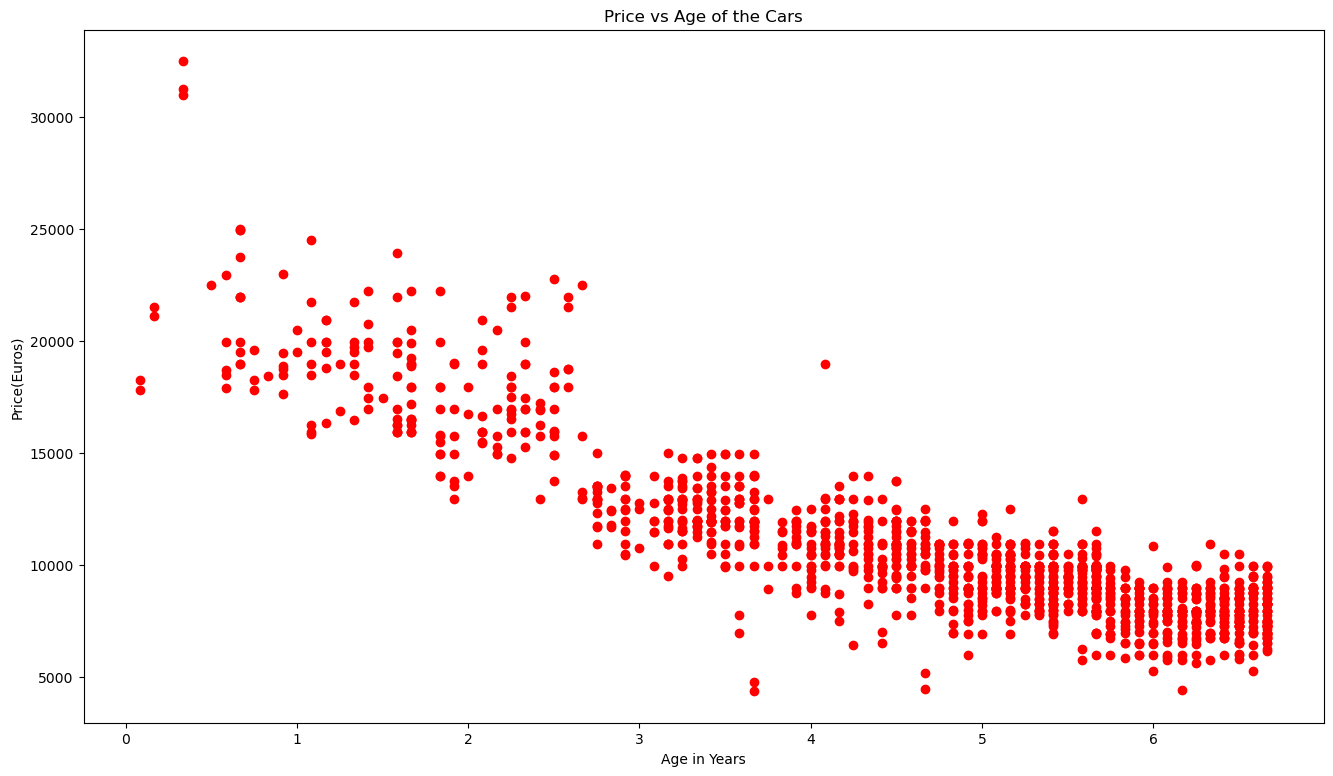

In [46]:
plt.scatter(cars['Age-Year'], cars['Price'], c = 'red')
plt.title('Price vs Age of the Cars')
plt.xlabel('Age in Years')
plt.ylabel('Price(Euros)')
plt.show()

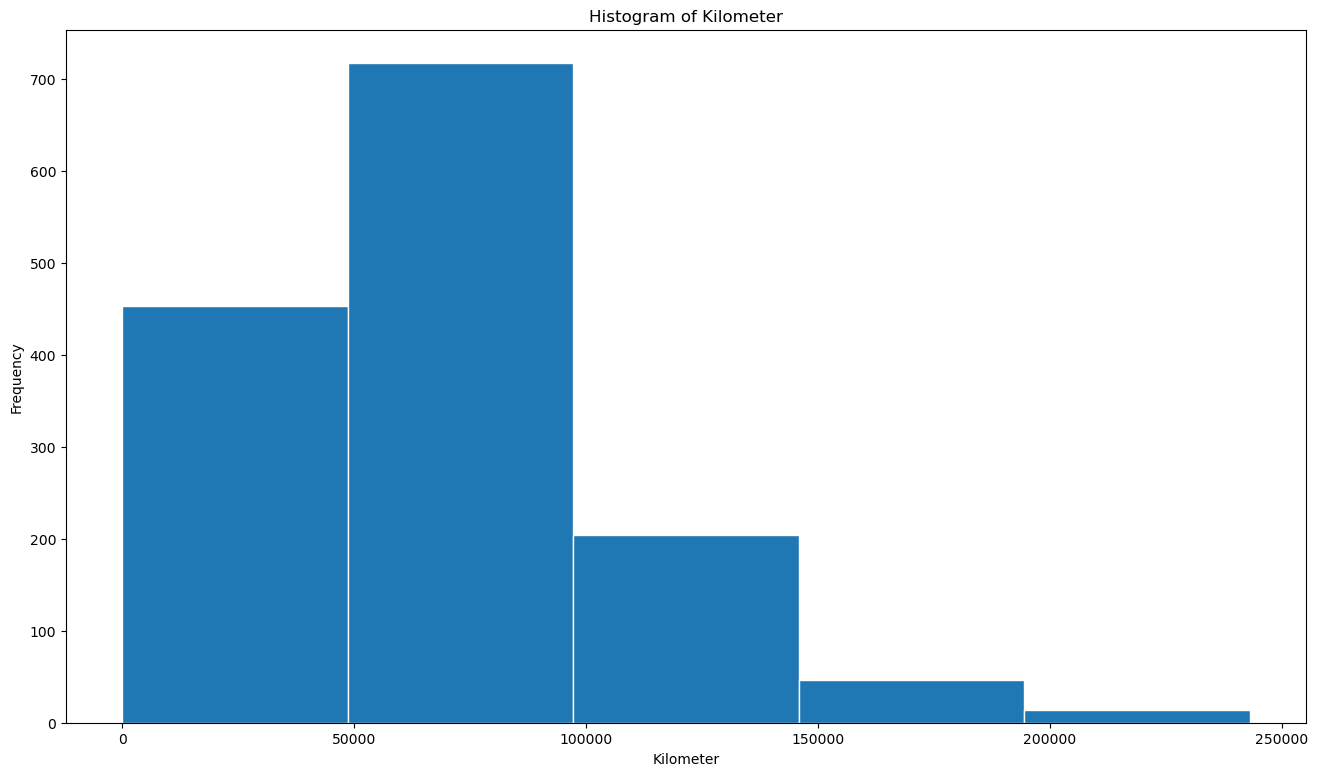

In [47]:
plt.hist(cars['KM'], edgecolor = 'white', bins = 5)
plt.title('Histogram of Kilometer')
plt.xlabel('Kilometer')
plt.ylabel('Frequency')
plt.show()

<AxesSubplot:title={'center':'Bar plot of Fuel Type'}, xlabel='Frequency', ylabel='Fuel Type'>

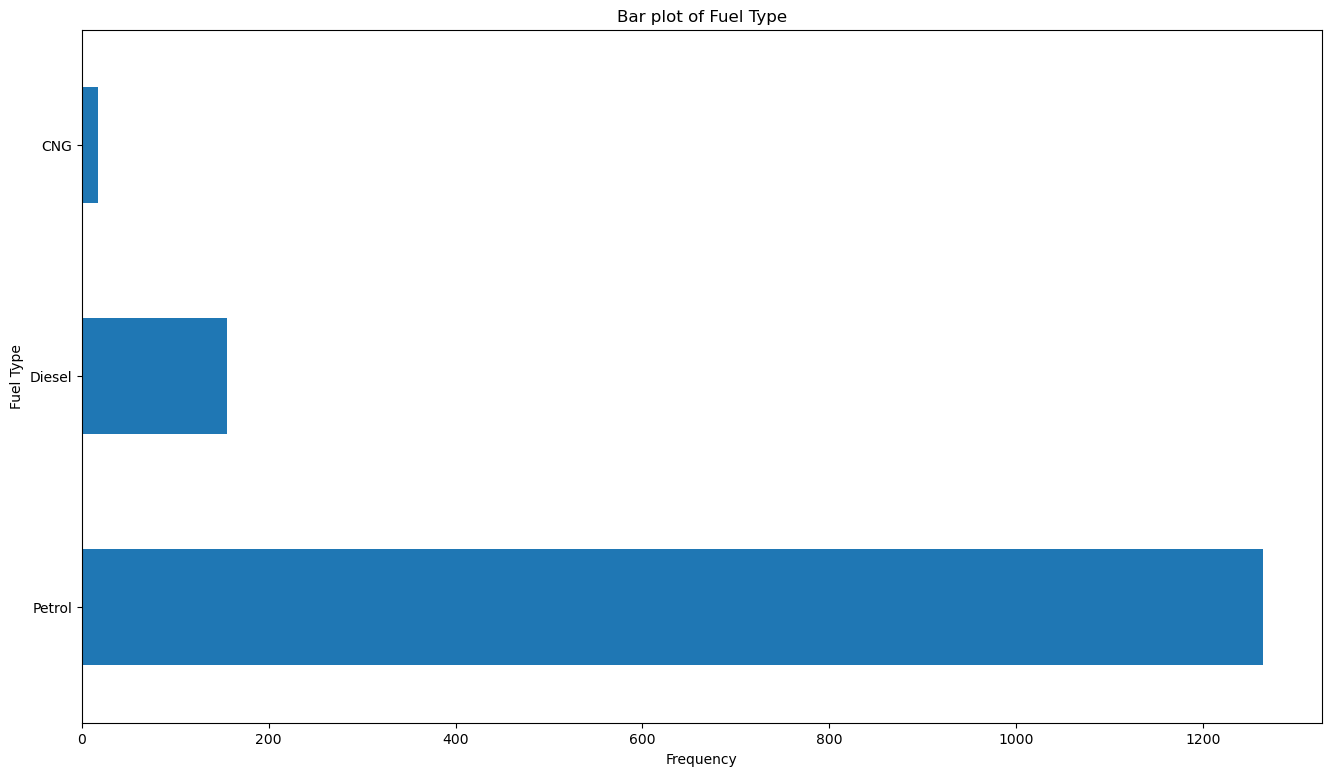

In [48]:
fuel_count = pd.value_counts(cars['Fuel_Type'].values, sort = True)
plt.xlabel('Frequency')
plt.ylabel('Fuel Type')
plt.title('Bar plot of Fuel Type')
fuel_count.plot.barh()

<AxesSubplot:xlabel='Age-Year', ylabel='Price'>

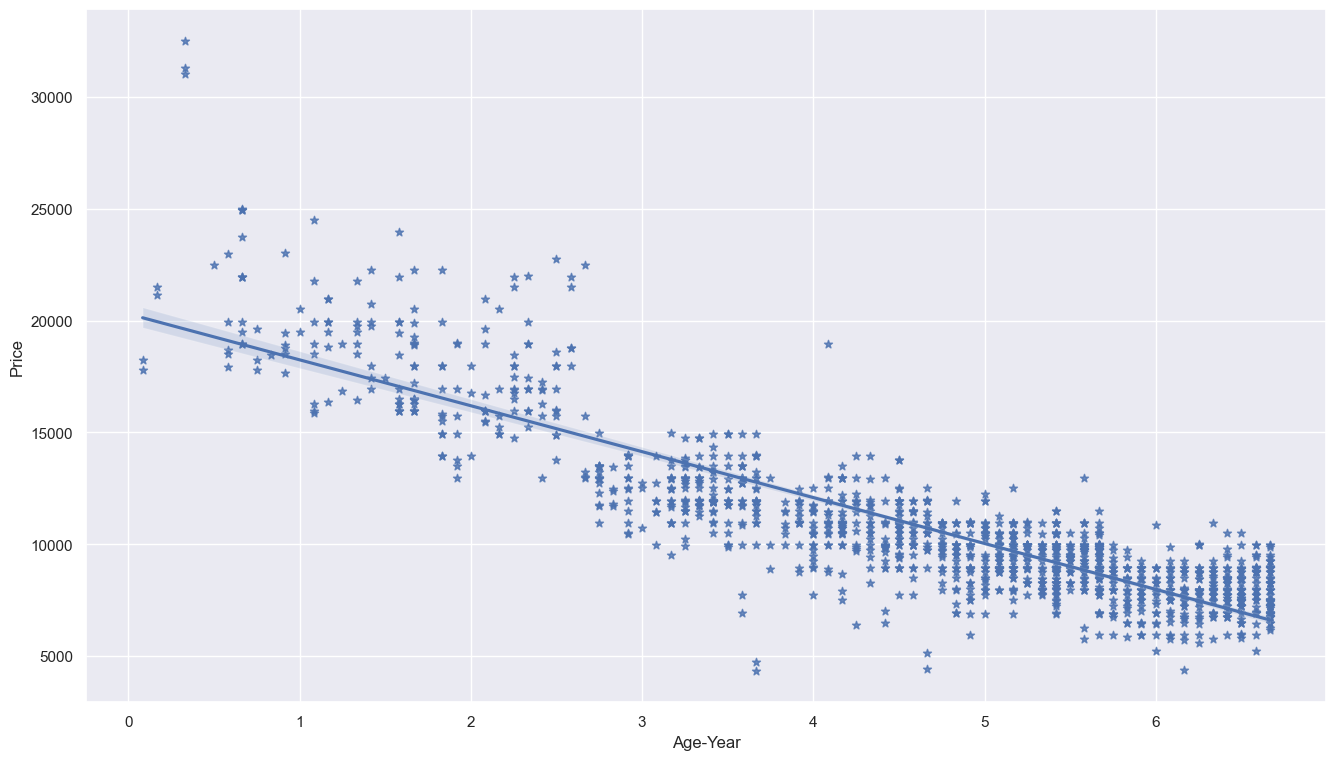

In [49]:
sns.set(style = 'darkgrid')
sns.regplot(x = cars['Age-Year'], y = cars['Price'], marker = '*')

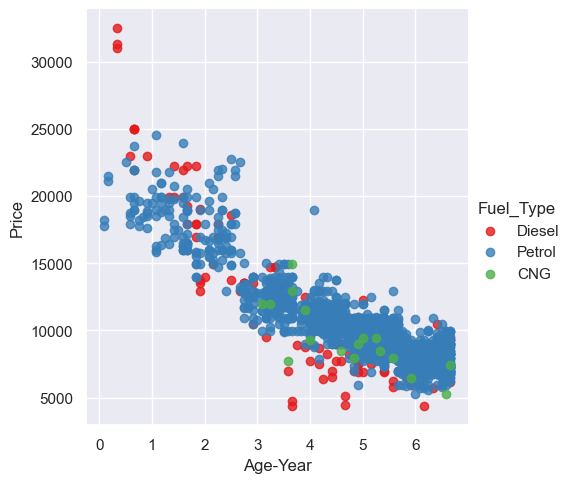

In [50]:
sns.lmplot(x = 'Age-Year', y = 'Price', data = cars, hue = 'Fuel_Type', fit_reg= False, legend = True, palette ='Set1')

C:\Users\91814\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Age_Months'>

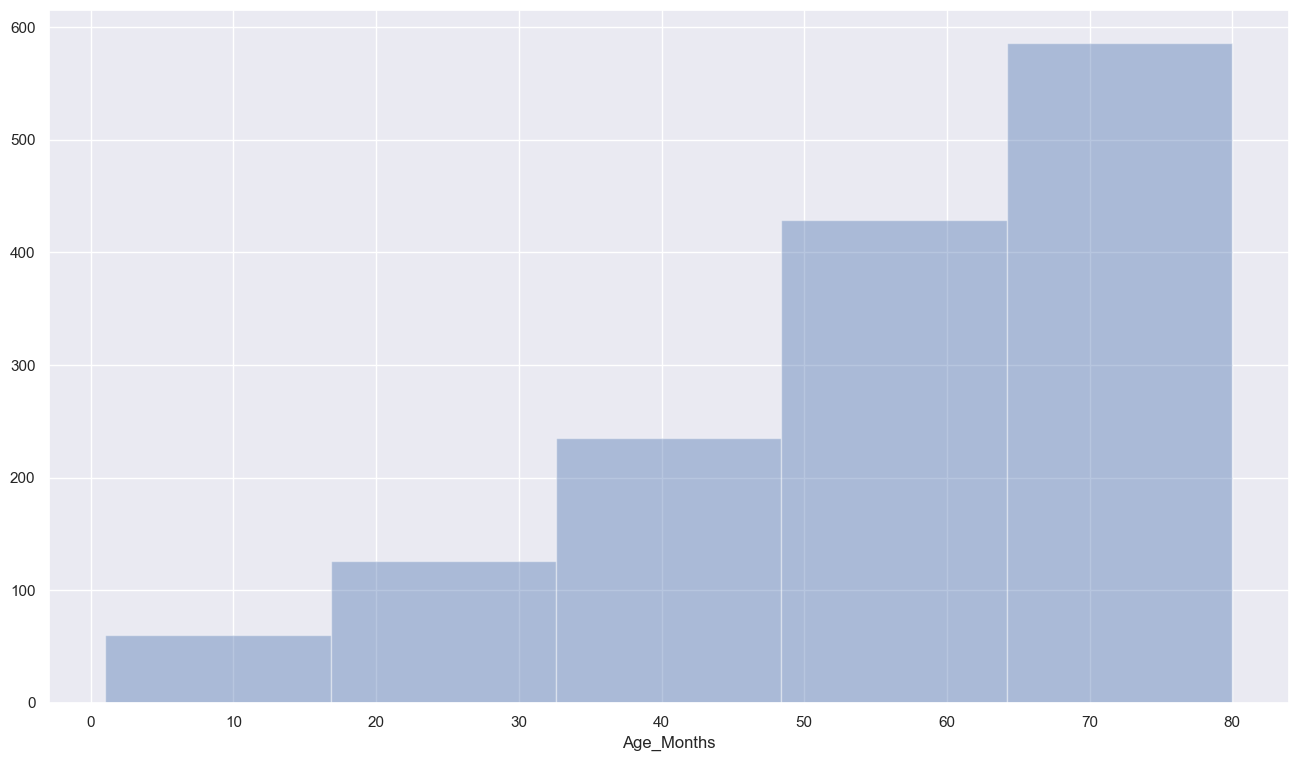

In [51]:
sns.distplot(cars['Age_Months'], kde = False, bins = 5)

<AxesSubplot:xlabel='Fuel_Type', ylabel='count'>

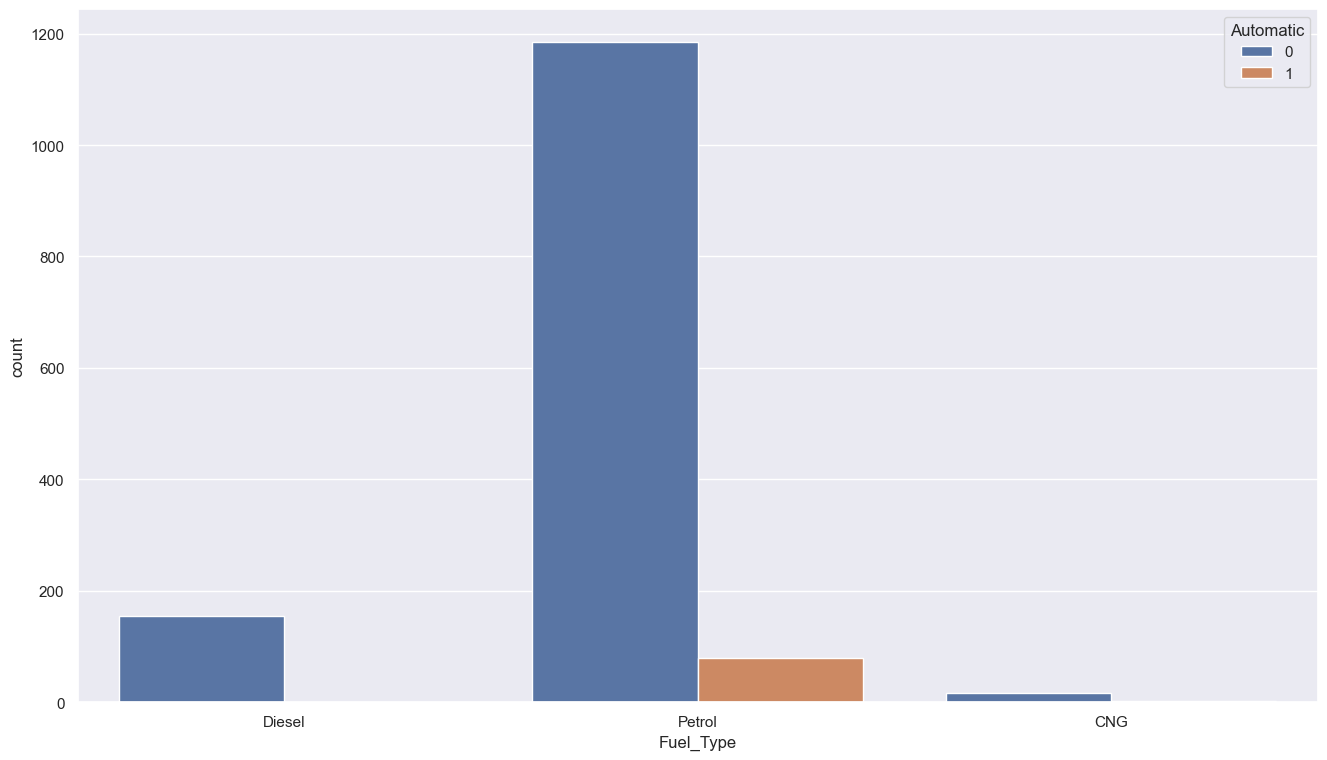

In [52]:
sns.countplot(x = 'Fuel_Type', data = cars, hue = 'Automatic')

<AxesSubplot:xlabel='Fuel_Type', ylabel='Price'>

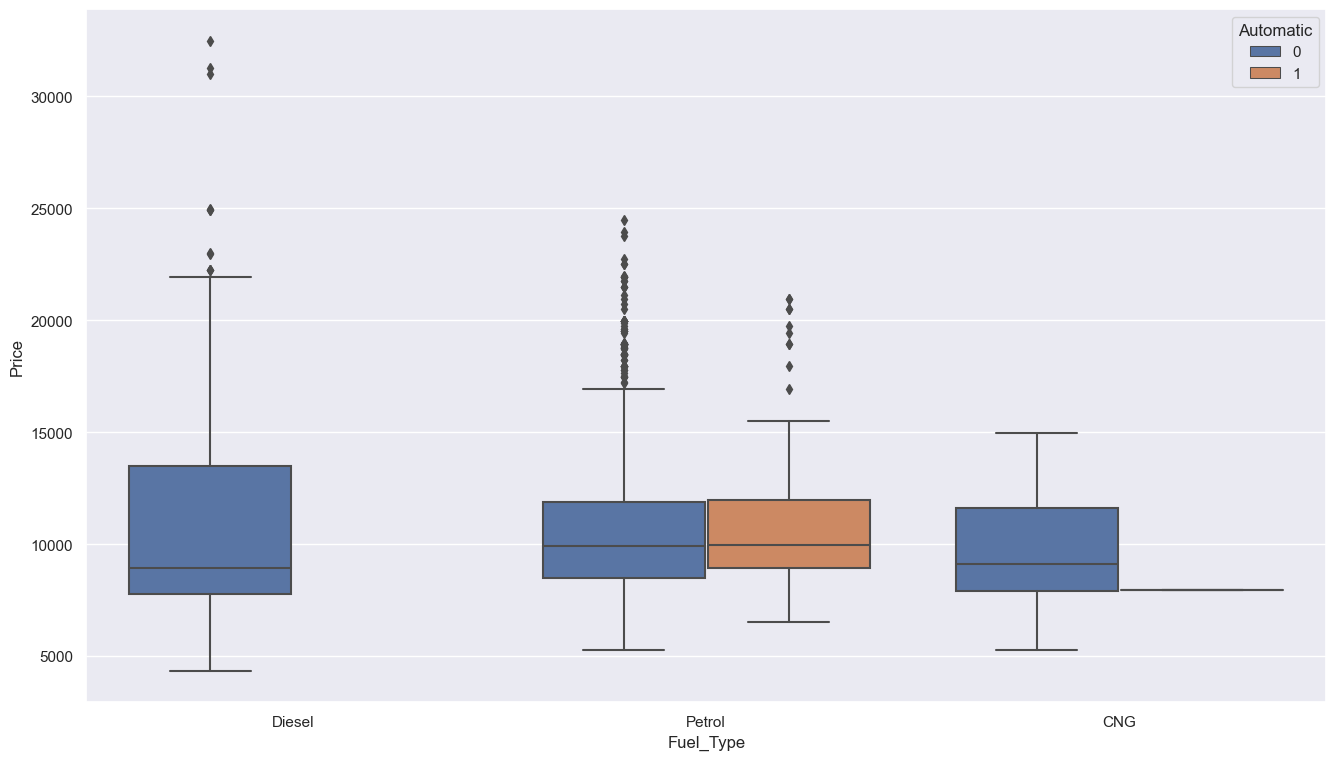

In [53]:
sns.boxplot(y = cars['Price'], x = cars['Fuel_Type'], hue = cars['Automatic'])

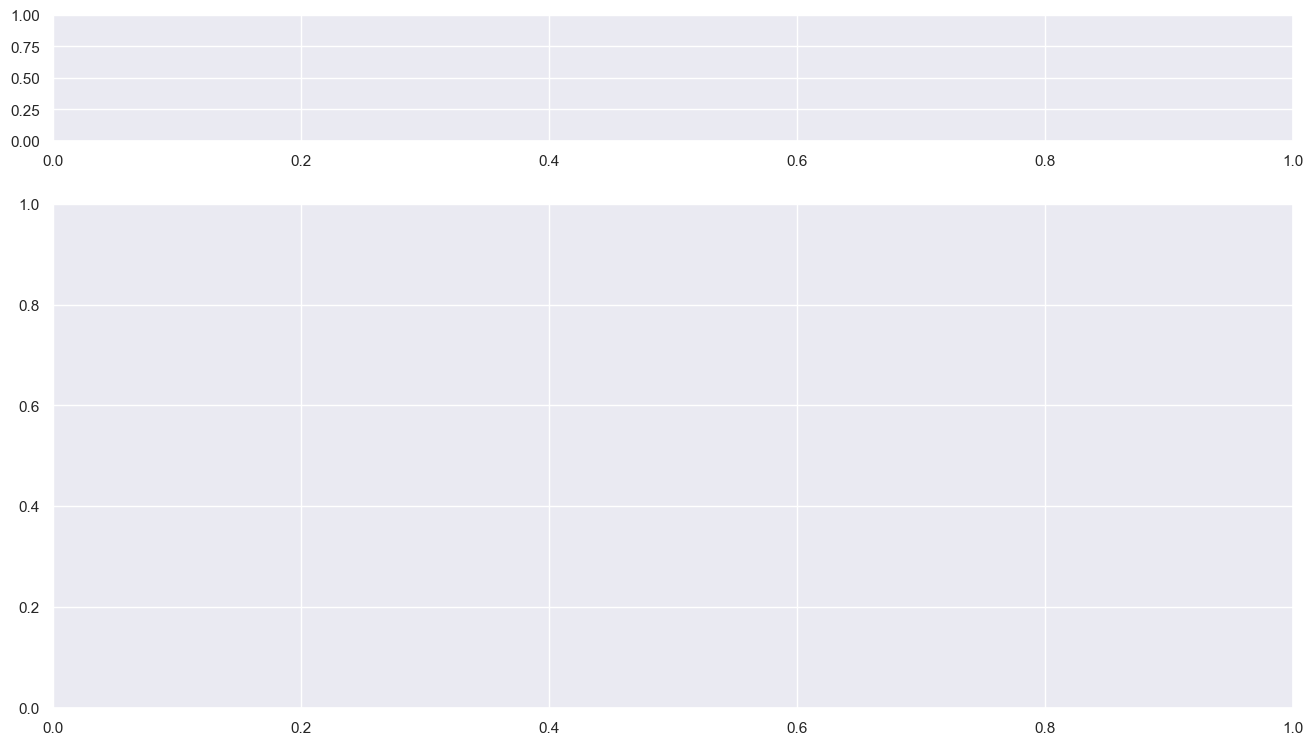

In [54]:
f, (ax_box, ax_hist) = plt.subplots(2, gridspec_kw={'height_ratios':(.20,.80)})

C:\Users\91814\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\91814\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Price'>

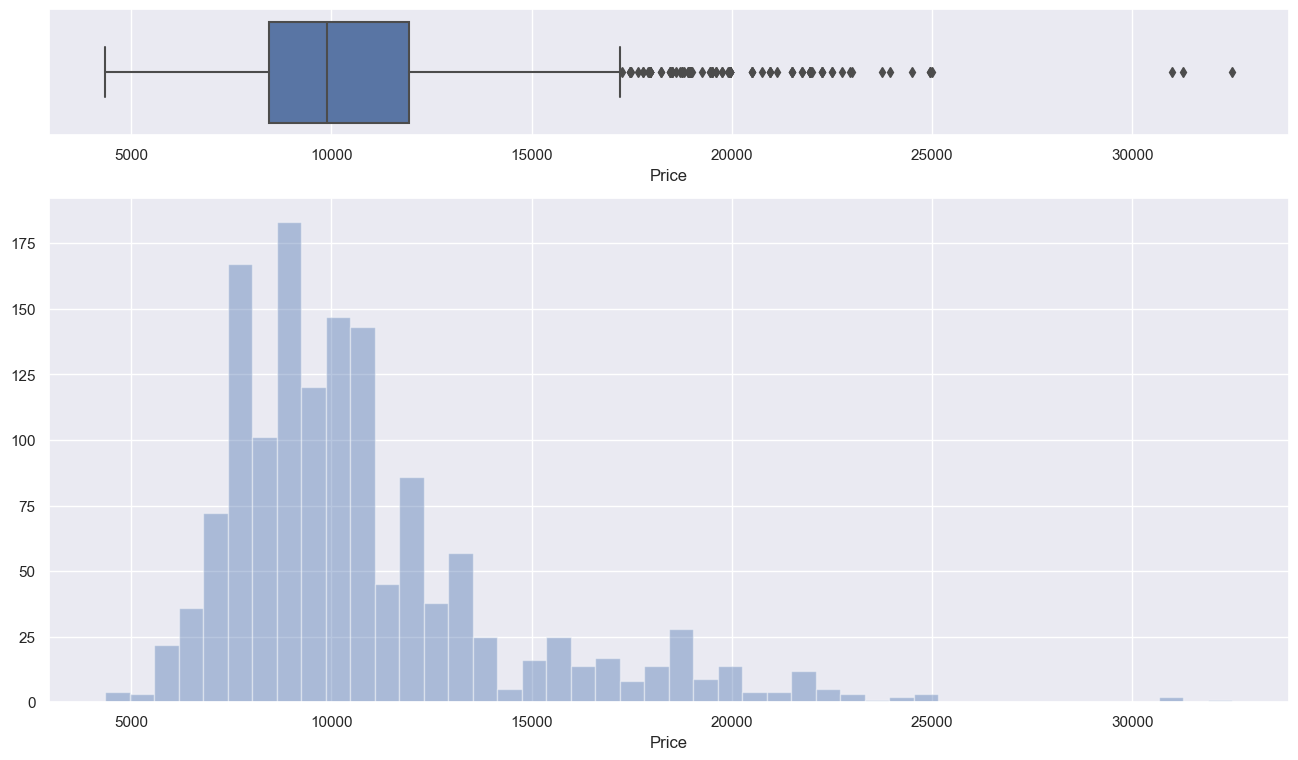

In [55]:
f, (ax_box, ax_hist) = plt.subplots(2, gridspec_kw={'height_ratios':(.20,.80)})
sns.boxplot(cars['Price'], ax = ax_box)
sns.distplot(cars['Price'], ax = ax_hist, kde = False)

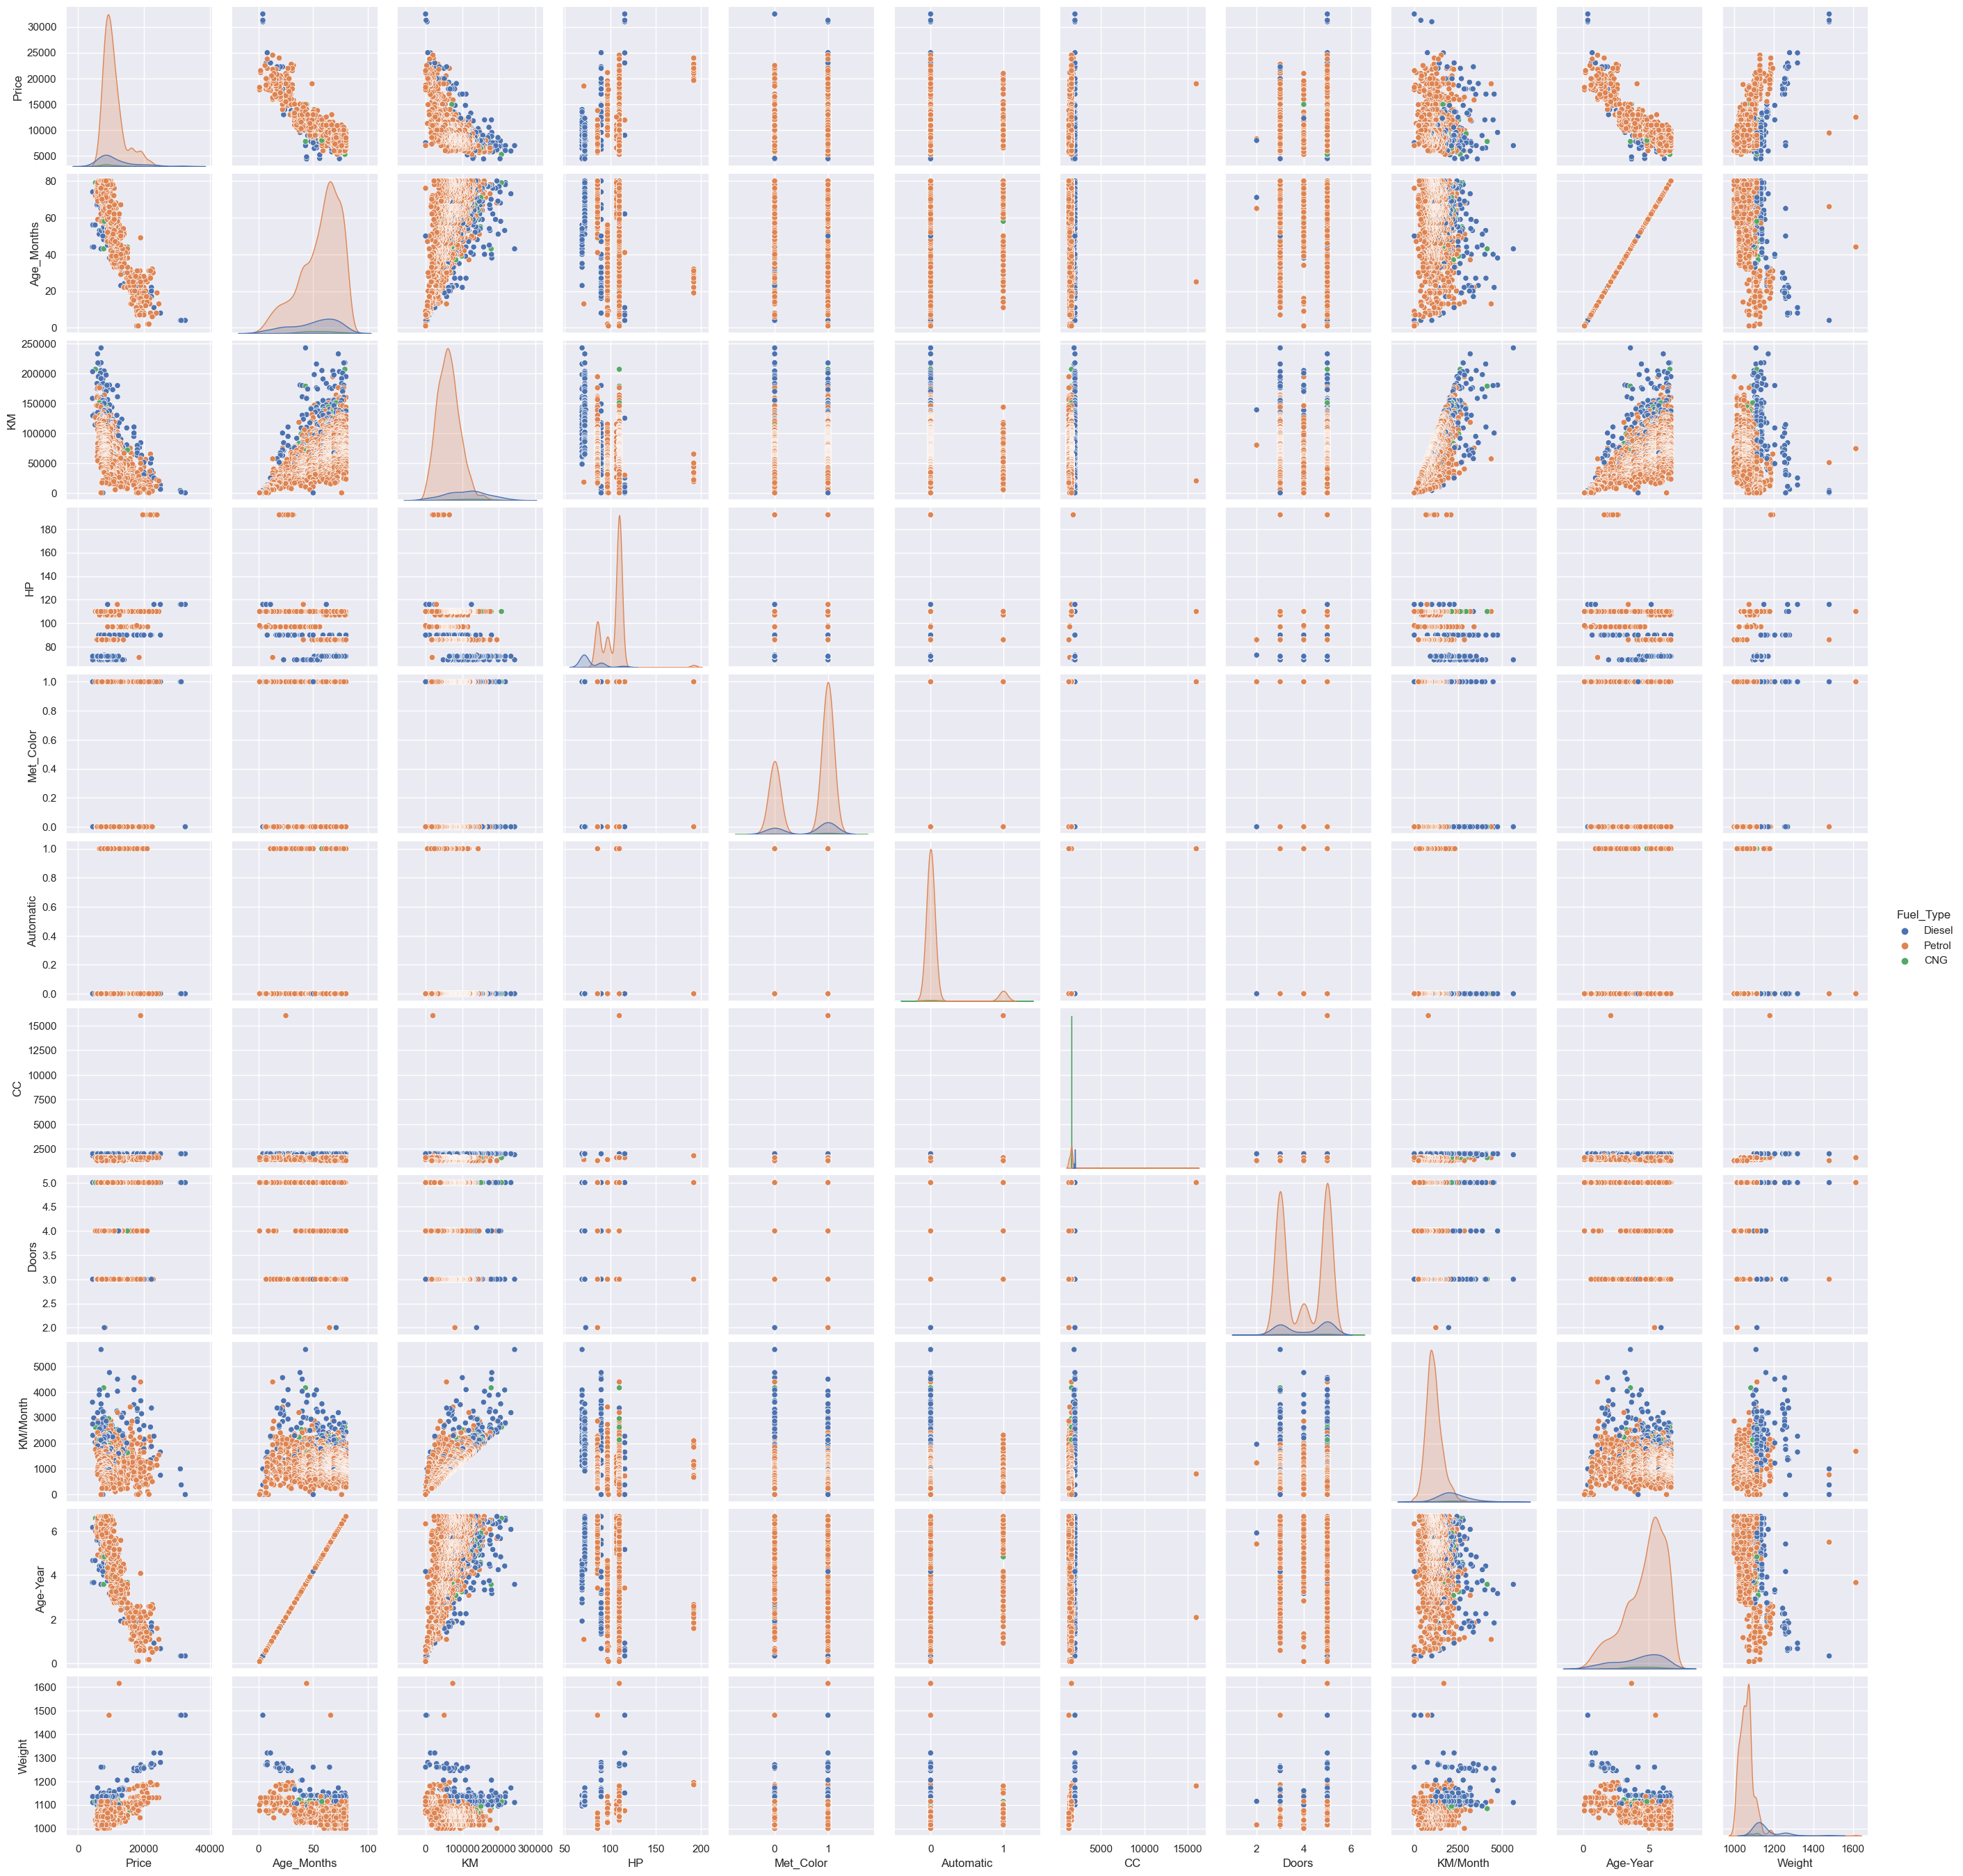

In [56]:
sns.pairplot(cars, kind = 'scatter', hue = 'Fuel_Type')

In [57]:
cars

Price  Age_Months     KM Fuel_Type   HP Met_Color   Color Automatic  \
Id                                                                          
1     13500          23  46986    Diesel   90         1    Blue         0   
2     13750          23  72937    Diesel   90         1  Silver         0   
3     13950          24  41711    Diesel   90         1    Blue         0   
4     14950          26  48000    Diesel   90         0   Black         0   
5     13750          30  38500    Diesel   90         0   Black         0   
...     ...         ...    ...       ...  ...       ...     ...       ...   
1438   7500          69  20544    Petrol   86         1    Blue         0   
1439  10845          72  19000    Petrol   86         0    Grey         0   
1440   8500          71  17016    Petrol   86         0    Blue         0   
1441   7250          70  16916    Petrol   86         1    Grey         0   
1442   6950          76      1    Petrol  110         0   Green         0   

        CC  Doors Price_Class        Age     KM/Month  Age-Year  Weight  
Id                                                                       
1     2000      3   Expensive  New Model  2042.869565  1.916667    1165  
2     2000      3   Expensive  New Model  3171.173913  1.916667    1165  
3     2000      3   Expensive  New Model  1737.958333  2.000000    1165  
4     2000      3   Expensive  New Model  1846.153846  2.166667    1165  
5     2000      3   Expensive  New Model  1283.333333  2.500000    1170  
...    ...    ...         ...        ...          ...       ...     ...  
1438  1300      3       Cheap        Old   297.739130  5.750000    1025  
1439  1300      3     Average   Very Old   263.888889  6.000000    1015  
1440  1300      3     Average   Very Old   239.661972  5.916667    1015  
1441  1300      3       Cheap   Very Old   241.657143  5.833333    1015  
1442  1600      5       Cheap   Very Old     0.013158  6.333333    1114  

[1436 rows x 15 columns]

#### **Model Building**

In [58]:
model=smf.ols('Price~Age_Months+KM+HP+CC+Doors+Weight',data=cars).fit()

#### **Finding tvalues and pvalues**

In [59]:
model.params

Intercept    -4235.488758
Age_Months    -122.401535
KM              -0.019527
HP              30.477660
CC              -0.090831
Doors          -35.065900
Weight          18.969177
dtype: float64

In [60]:
model.tvalues , np.round(model.pvalues,5)

(Intercept     -4.453168
 Age_Months   -46.654063
 KM           -16.078713
 HP            11.962502
 CC            -1.009799
 Doors         -0.890740
 Weight        21.865811
 dtype: float64,
 Intercept     0.00001
 Age_Months    0.00000
 KM            0.00000
 HP            0.00000
 CC            0.31276
 Doors         0.37322
 Weight        0.00000
 dtype: float64)

#### **Finding rsquared values**

In [61]:
model.rsquared , model.rsquared_adj

(0.8619469563049698, 0.8613673074161172)

 #### **Build SLR and MLR models for insignificant variables 'CC' and 'Doors' & Also find their tvalues and pvalues**

In [62]:
slr_c=smf.ols('Price~CC',data=cars).fit()
slr_c.tvalues , slr_c.pvalues # CC has significant pvalue

(Intercept    24.694090
 CC            4.824822
 dtype: float64,
 Intercept    1.766912e-112
 CC            1.550808e-06
 dtype: float64)

In [63]:
slr_d=smf.ols('Price~Doors',data=cars).fit()
slr_d.tvalues , slr_d.pvalues # Doors has significant pvalue

(Intercept    19.258097
 Doors         7.141657
 dtype: float64,
 Intercept    1.094732e-73
 Doors        1.461237e-12
 dtype: float64)

In [64]:
mlr_cd=smf.ols('Price~CC+Doors',data=cars).fit()
mlr_cd.tvalues , mlr_cd.pvalues # CC & Doors have significant pvalue

(Intercept    12.620704
 CC            4.340400
 Doors         6.816153
 dtype: float64,
 Intercept    1.056885e-34
 CC           1.521992e-05
 Doors        1.373469e-11
 dtype: float64)

#### **Model Validation**

#### **Two Techniques**

1. Collinearity Check 
2. Residual Analysis


#### **1) Collinearity Problem Check**

In [65]:
rsq_age=smf.ols('Age_Months~KM+HP+CC+Doors+Weight',data=cars).fit().rsquared
vif_age=1/(1-rsq_age)

rsq_KM=smf.ols('KM~Age_Months+HP+CC+Doors+Weight',data=cars).fit().rsquared
vif_KM=1/(1-rsq_KM)

rsq_HP=smf.ols('HP~Age_Months+KM+CC+Doors+Weight',data=cars).fit().rsquared
vif_HP=1/(1-rsq_HP)

rsq_CC=smf.ols('CC~Age_Months+KM+HP+Doors+Weight',data=cars).fit().rsquared
vif_CC=1/(1-rsq_CC)

rsq_DR=smf.ols('Doors~Age_Months+KM+HP+CC+Weight',data=cars).fit().rsquared
vif_DR=1/(1-rsq_DR)

rsq_WT=smf.ols('Weight~Age_Months+KM+HP+CC+Doors',data=cars).fit().rsquared
vif_WT=1/(1-rsq_WT)

# Putting the values in Dataframe format
d1={'Variables':['Age_Months','KM','HP','CC','Doors','Weight'],
    'Vif':[vif_age,vif_KM,vif_HP,vif_CC,vif_DR,vif_WT]}
Vif_df=pd.DataFrame(d1)
Vif_df

Variables       Vif
0  Age_Months  1.873785
1          KM  1.632574
2          HP  1.146318
3          CC  1.146623
4       Doors  1.106772
5      Weight  1.641027

#### **2) Residual Analysis**

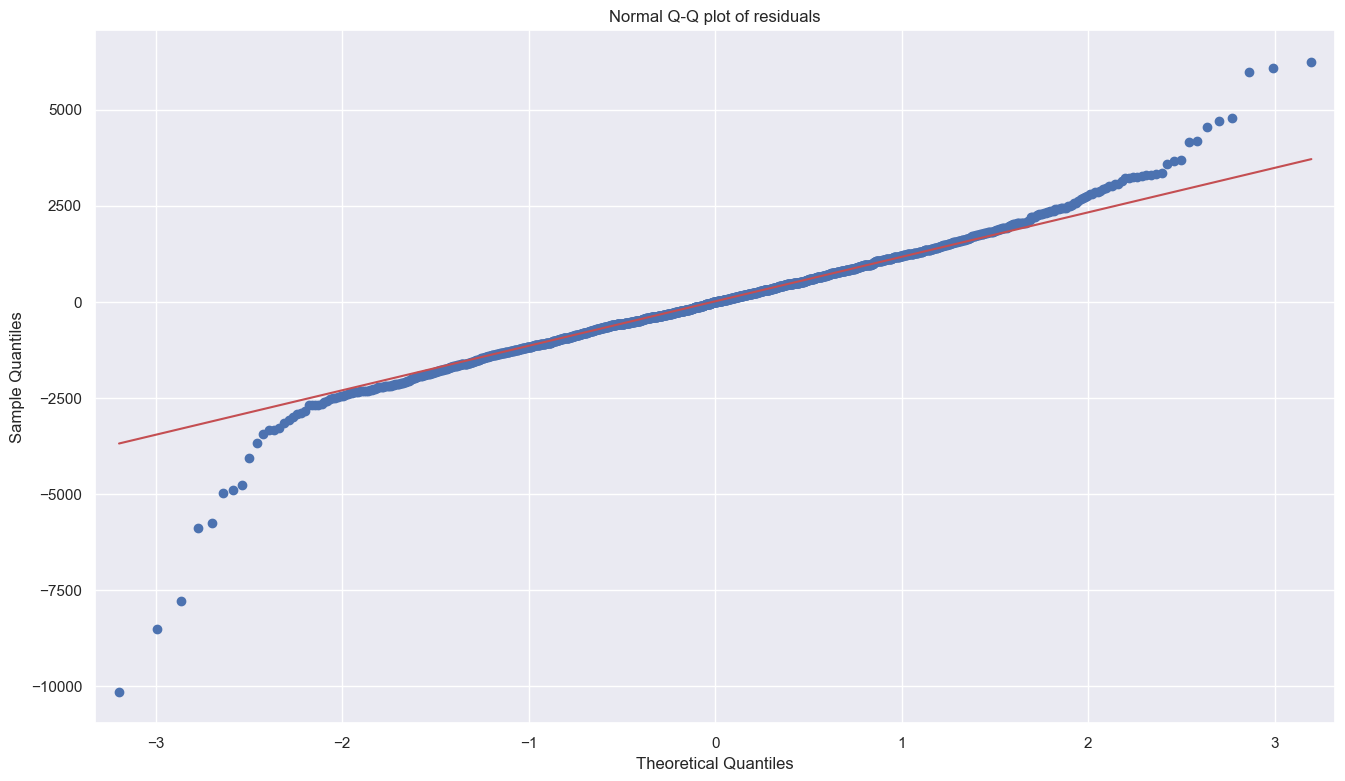

In [66]:
sm.qqplot(model.resid,line='q') 
plt.title("Normal Q-Q plot of residuals")
plt.show()

#### **Outliar detection from above QQ plot of residuals**

In [67]:
list(np.where(model.resid>6000))

[array([147, 523], dtype=int64)]

In [68]:
list(np.where(model.resid<-6000))

[array([221, 601, 960], dtype=int64)]

In [69]:
def standard_values(vals) : return (vals-vals.mean())/vals.std()

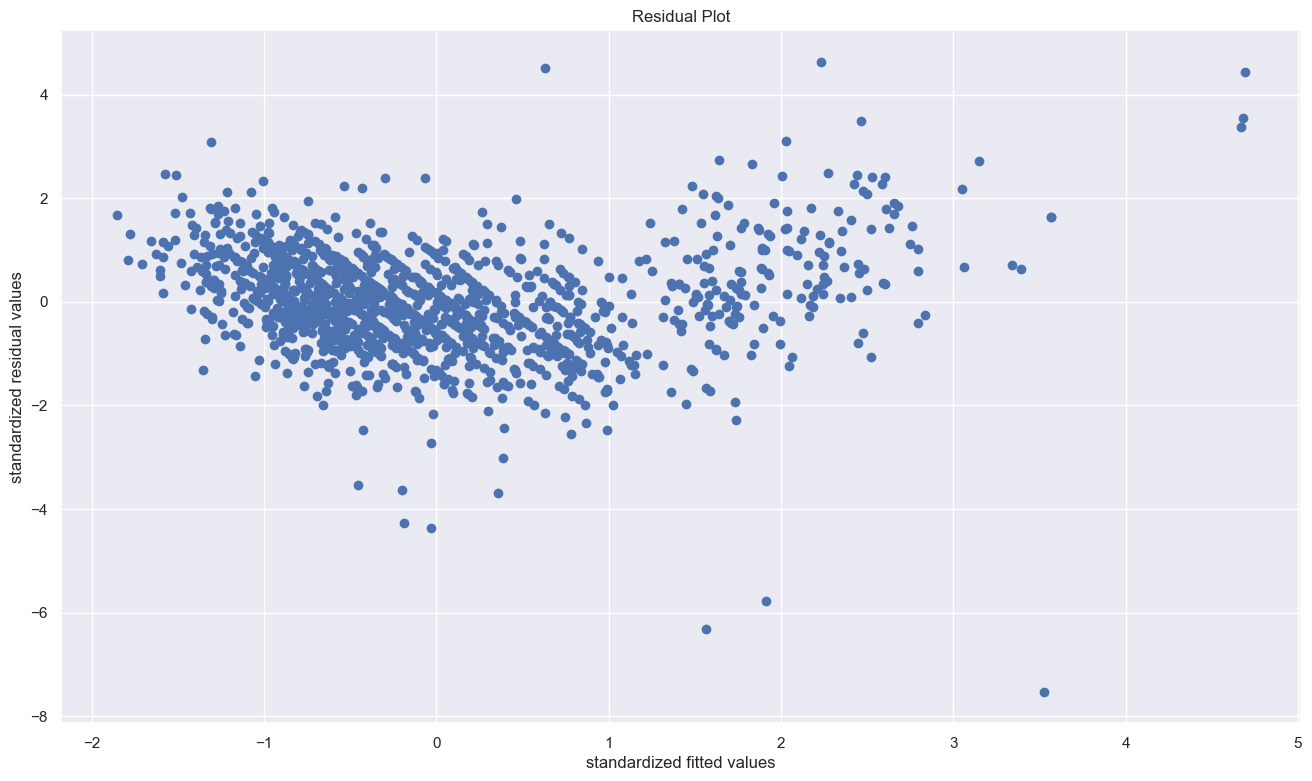

In [70]:
plt.scatter(standard_values(model.fittedvalues),standard_values(model.resid))
plt.title('Residual Plot')
plt.xlabel('standardized fitted values')
plt.ylabel('standardized residual values')
plt.show() 

eval_env: 1


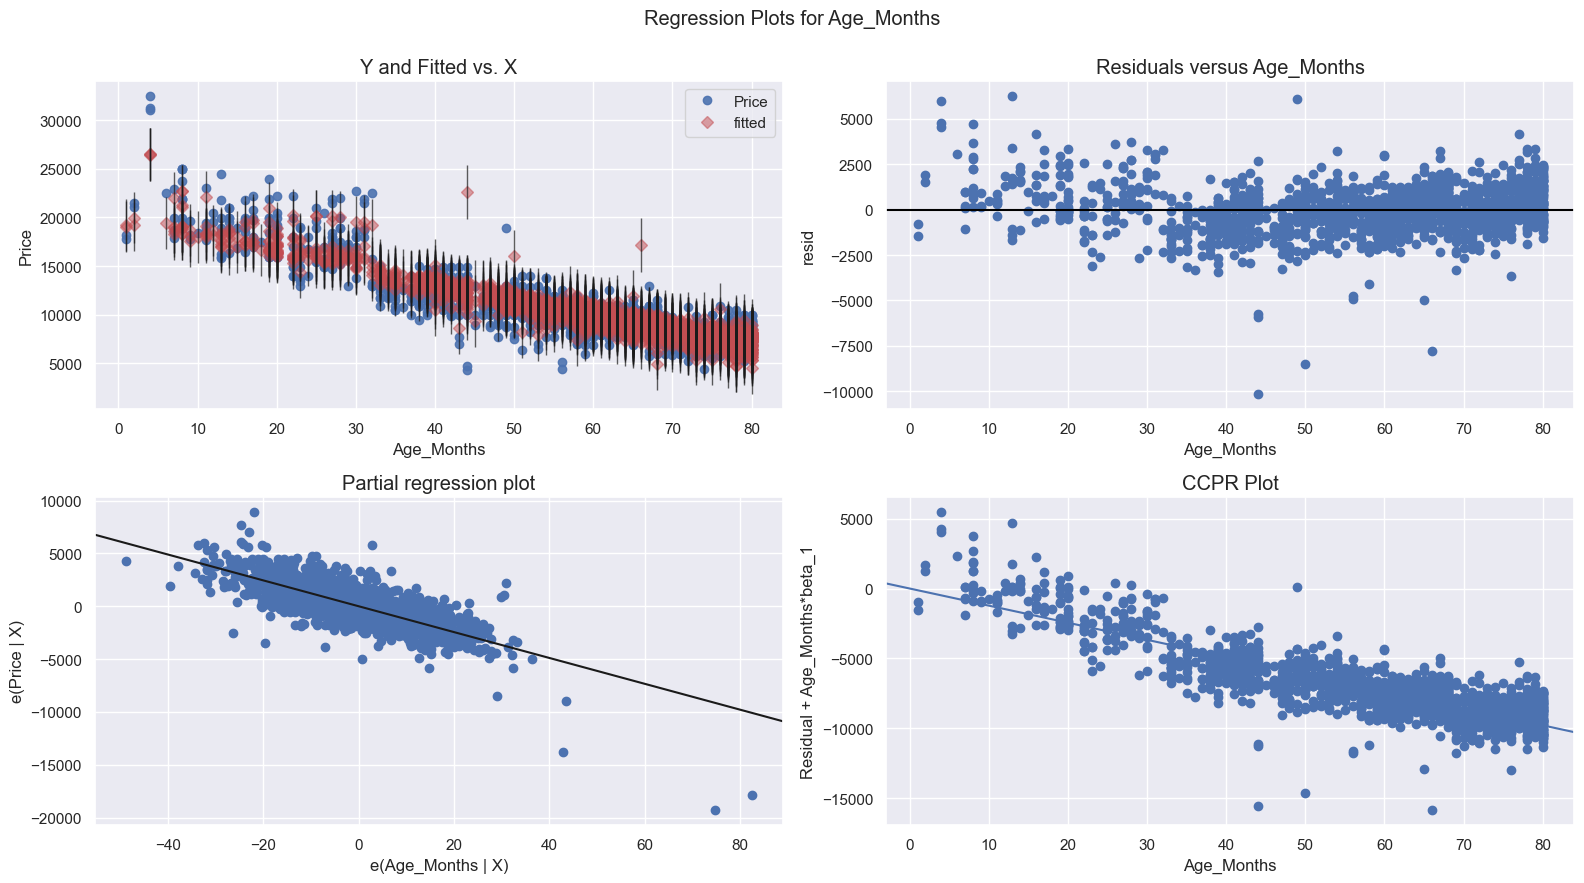

In [71]:
sm.graphics.plot_regress_exog(model,'Age_Months')
plt.show()

eval_env: 1


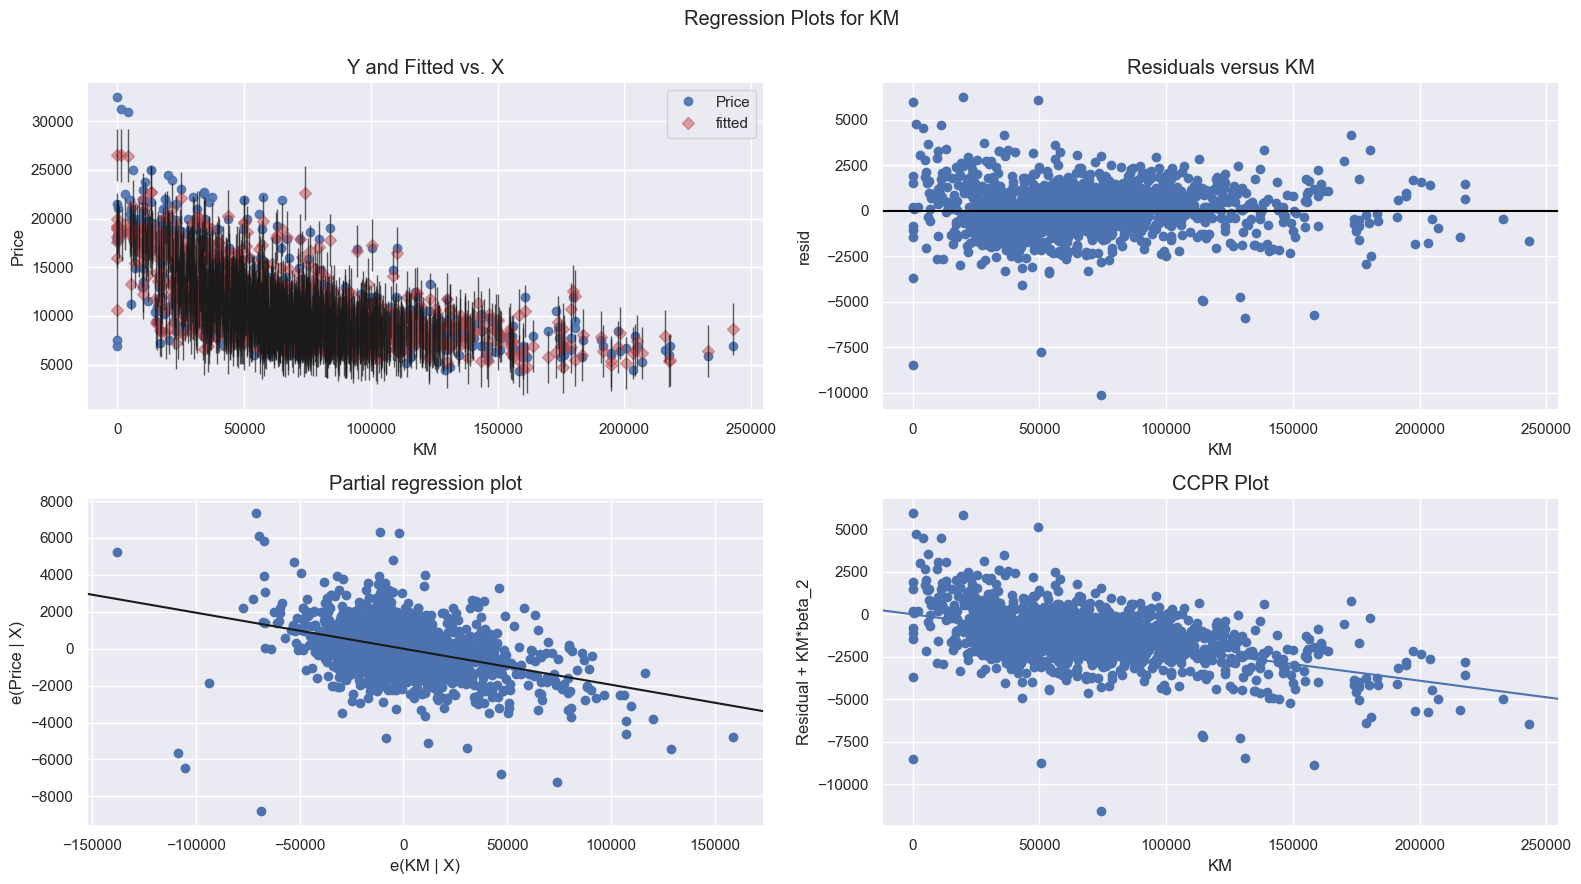

In [72]:
sm.graphics.plot_regress_exog(model,'KM')
plt.show()

eval_env: 1


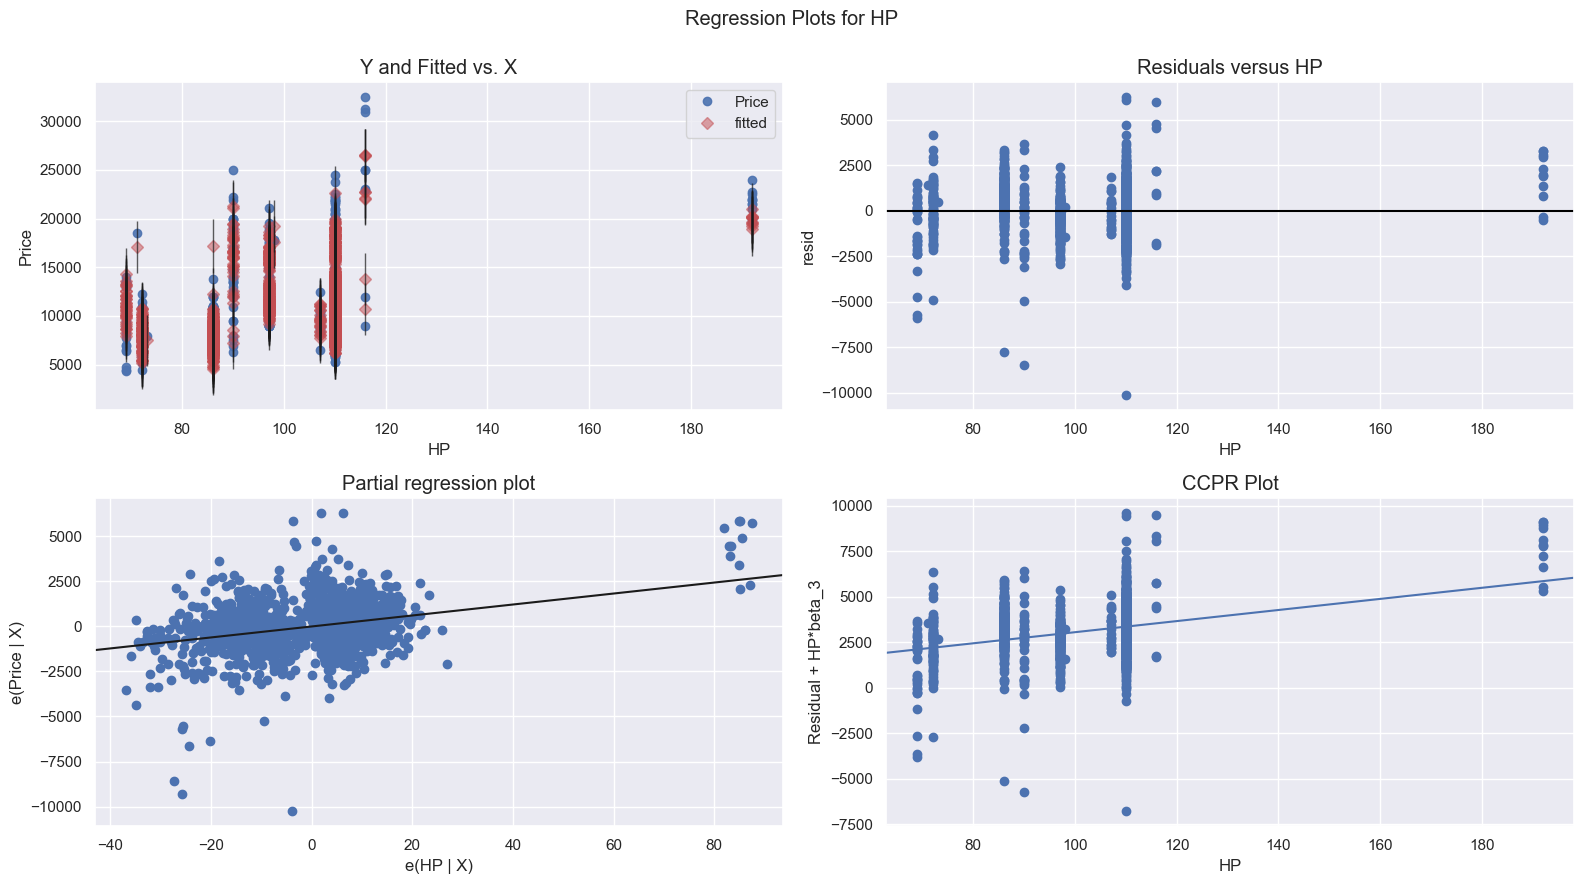

In [73]:
sm.graphics.plot_regress_exog(model,'HP')
plt.show()

eval_env: 1


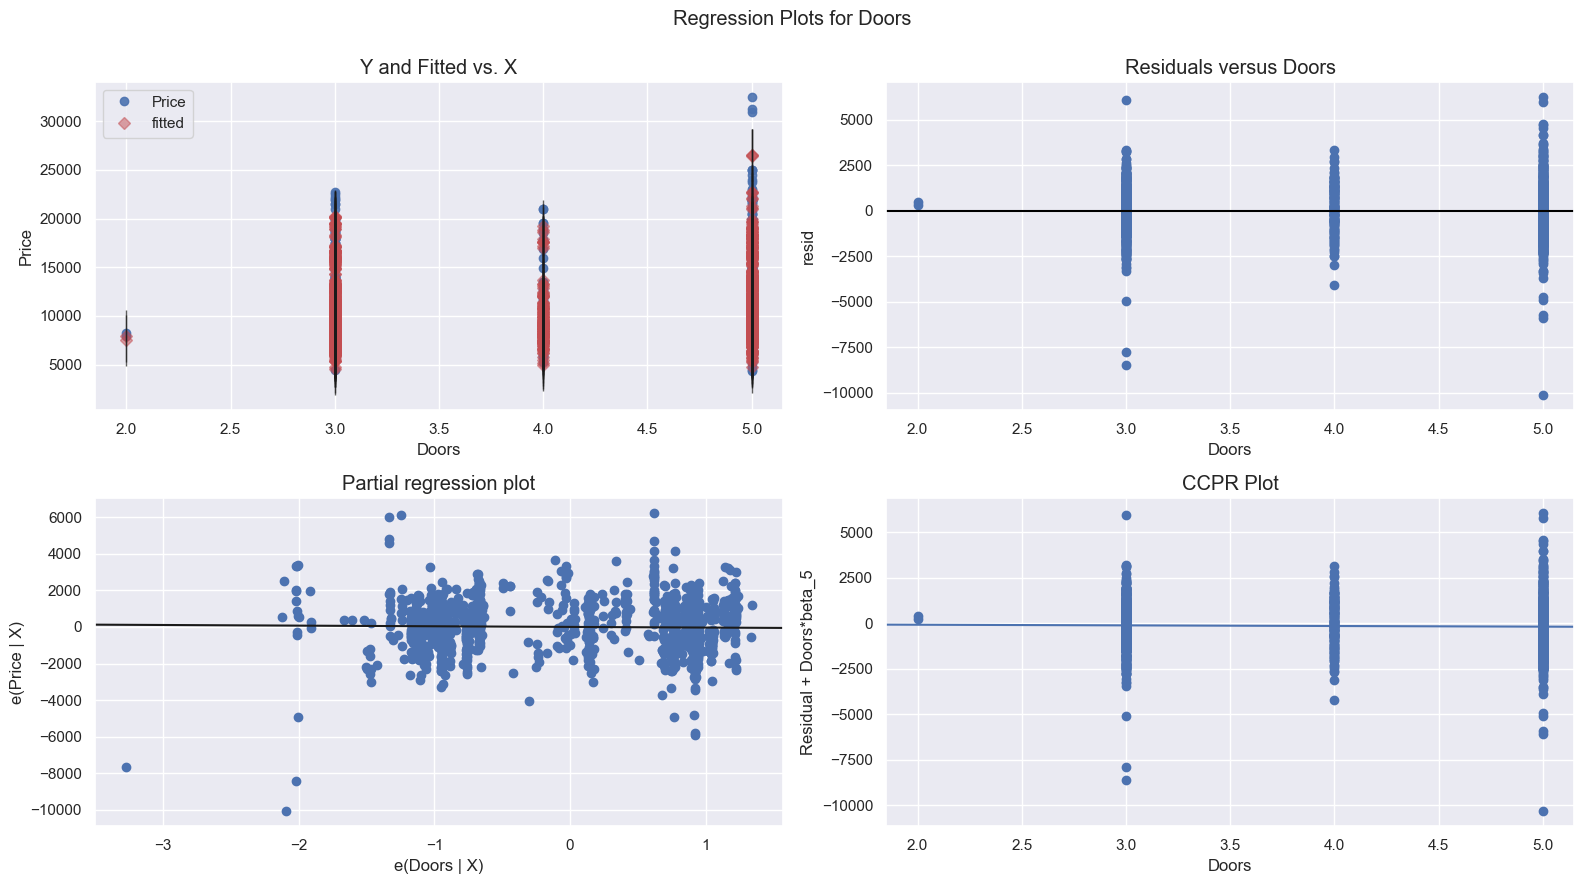

In [74]:
sm.graphics.plot_regress_exog(model,'Doors')
plt.show()

eval_env: 1


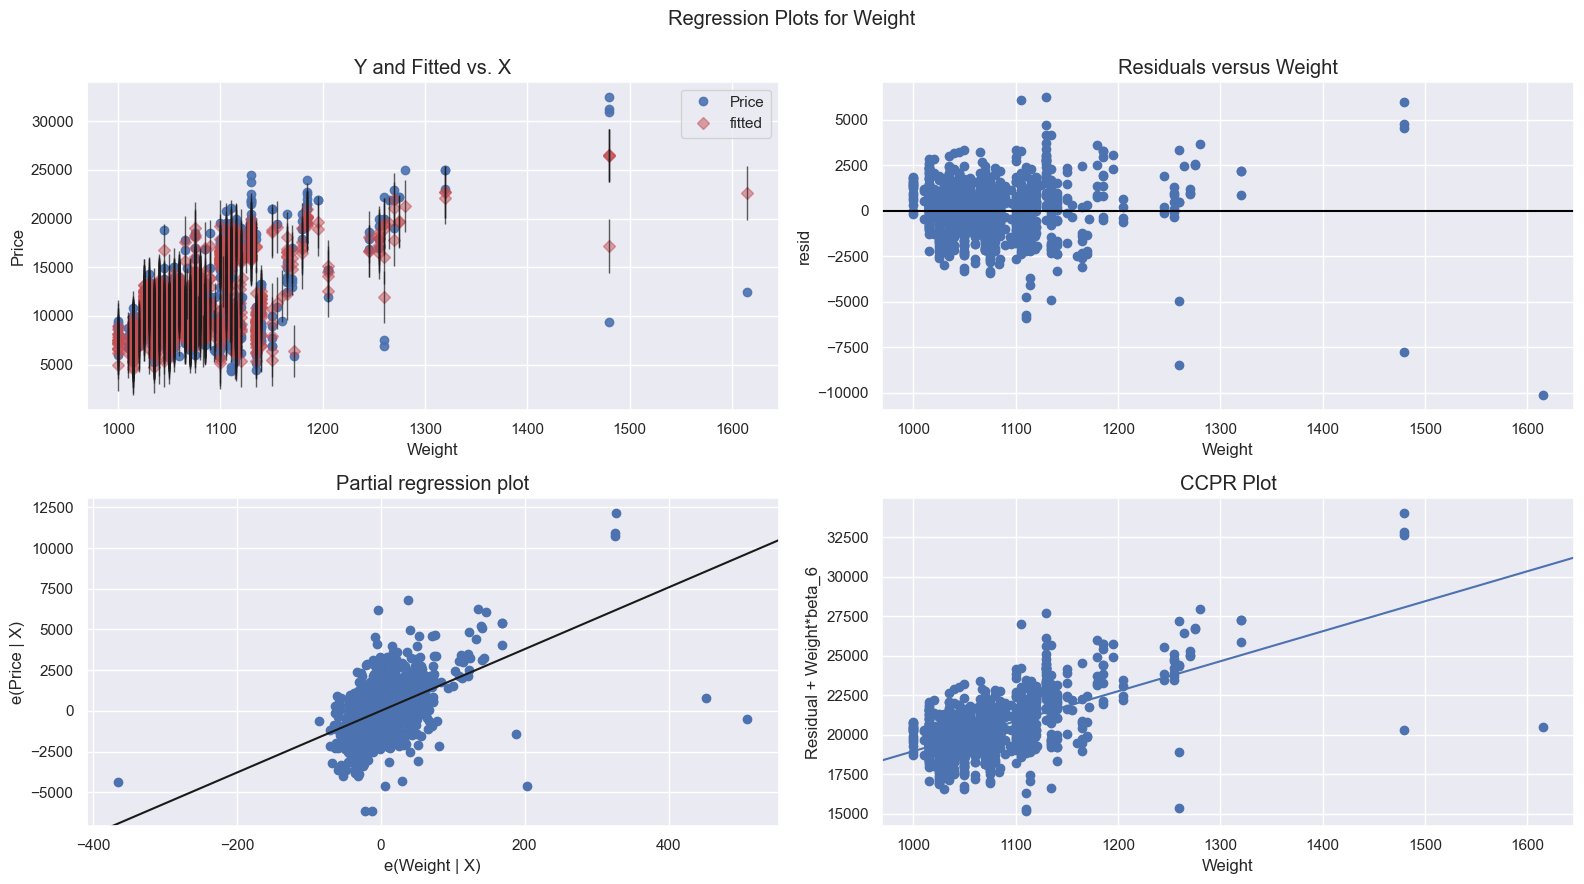

In [75]:
sm.graphics.plot_regress_exog(model,'Weight')
plt.show()

#### **Model Deletion Diagnostics (checking Outliers or Influencers)**

#### **Two Techniques** 
1. Cook's Distance 
2. Leverage value

#### **1. Cook's Distance: If Cook's distance > 1, then it's an outlier**

In [76]:
(c,_)=model.get_influence().cooks_distance
c

array([4.96301242e-03, 2.88615825e-03, 3.58665492e-03, ...,
       5.72685265e-06, 7.89998358e-04, 1.18728817e-02])

#### **Plot the influencers using the stem plot**

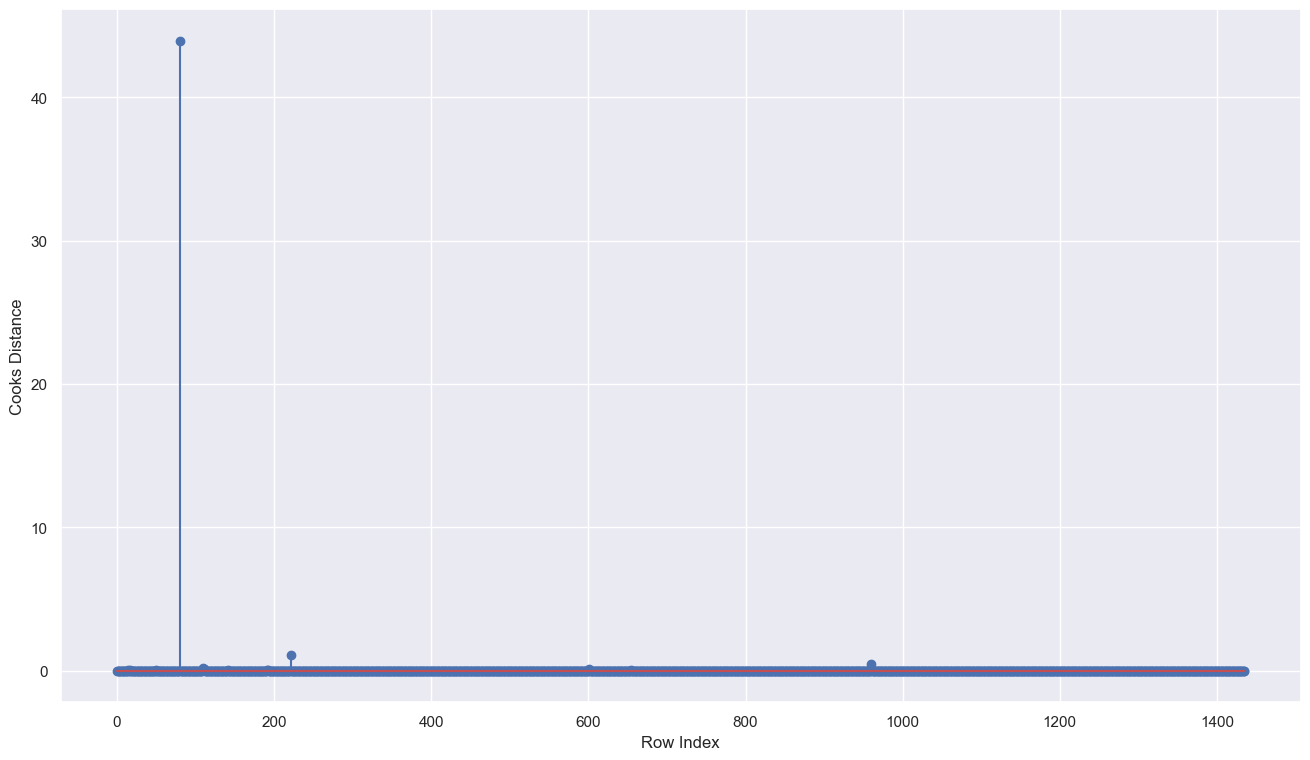

In [77]:
plt.stem(np.arange(len(cars)),np.round(c,3))
plt.xlabel('Row Index')
plt.ylabel('Cooks Distance')
plt.show()

#### **Index and value of influencer where C>0.5**

In [78]:
np.argmax(c) , np.max(c)

(80, 43.95202951352482)

#### **2. Leverage Value using High Influence Points : Points beyond Leverage_cutoff value are influencers**

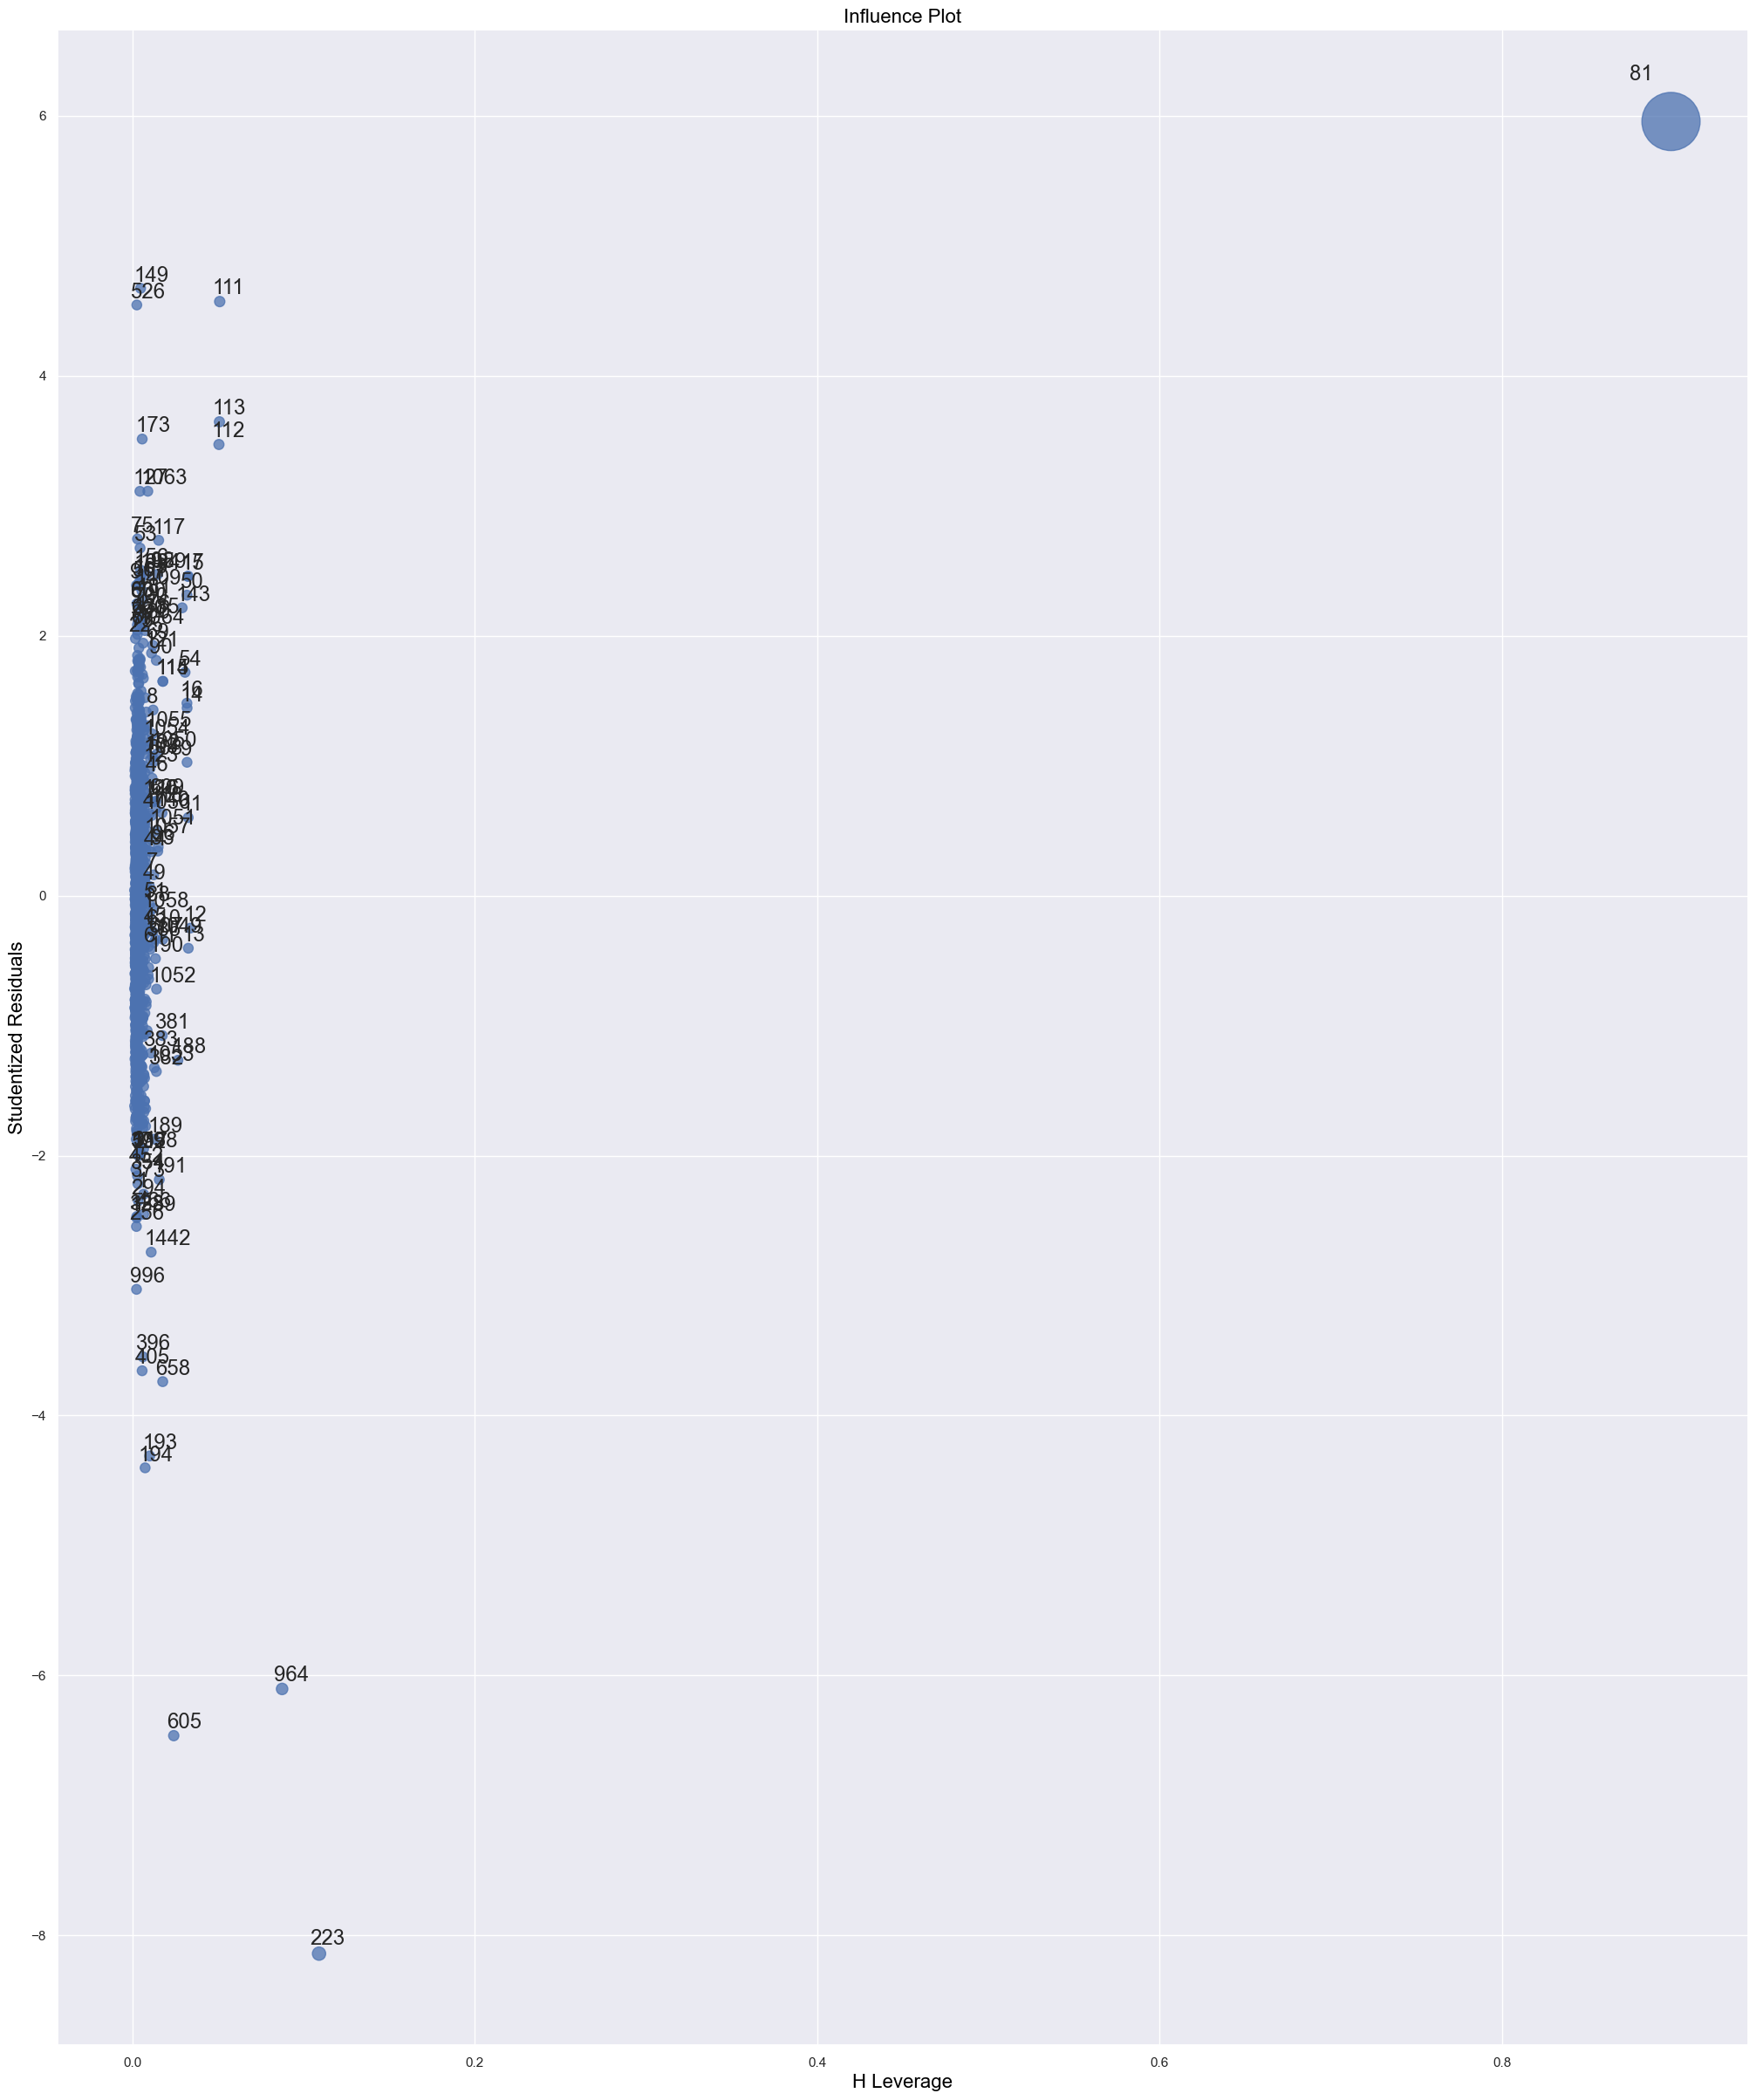

In [79]:
fig,ax=plt.subplots(figsize=(25,30))
fig=influence_plot(model,ax = ax)

In [80]:
k=cars.shape[1]
n=cars.shape[0]
leverage_cutoff = (3*(k+1))/n
leverage_cutoff

0.033426183844011144

In [81]:
cars[cars.index.isin([80])] 

Price  Age_Months     KM Fuel_Type  HP Met_Color Color Automatic    CC  \
Id                                                                           
80  14900          30  22000    Petrol  97         1  Grey         0  1400   

    Doors Price_Class        Age    KM/Month  Age-Year  Weight  
Id                                                              
80      5   Expensive  New Model  733.333333       2.5    1110

#### **Improving the Model**

In [82]:
cars2=cars.copy()
cars2

Price  Age_Months     KM Fuel_Type   HP Met_Color   Color Automatic  \
Id                                                                          
1     13500          23  46986    Diesel   90         1    Blue         0   
2     13750          23  72937    Diesel   90         1  Silver         0   
3     13950          24  41711    Diesel   90         1    Blue         0   
4     14950          26  48000    Diesel   90         0   Black         0   
5     13750          30  38500    Diesel   90         0   Black         0   
...     ...         ...    ...       ...  ...       ...     ...       ...   
1438   7500          69  20544    Petrol   86         1    Blue         0   
1439  10845          72  19000    Petrol   86         0    Grey         0   
1440   8500          71  17016    Petrol   86         0    Blue         0   
1441   7250          70  16916    Petrol   86         1    Grey         0   
1442   6950          76      1    Petrol  110         0   Green         0   

        CC  Doors Price_Class        Age     KM/Month  Age-Year  Weight  
Id                                                                       
1     2000      3   Expensive  New Model  2042.869565  1.916667    1165  
2     2000      3   Expensive  New Model  3171.173913  1.916667    1165  
3     2000      3   Expensive  New Model  1737.958333  2.000000    1165  
4     2000      3   Expensive  New Model  1846.153846  2.166667    1165  
5     2000      3   Expensive  New Model  1283.333333  2.500000    1170  
...    ...    ...         ...        ...          ...       ...     ...  
1438  1300      3       Cheap        Old   297.739130  5.750000    1025  
1439  1300      3     Average   Very Old   263.888889  6.000000    1015  
1440  1300      3     Average   Very Old   239.661972  5.916667    1015  
1441  1300      3       Cheap   Very Old   241.657143  5.833333    1015  
1442  1600      5       Cheap   Very Old     0.013158  6.333333    1114  

[1436 rows x 15 columns]

In [83]:
cars3=cars2.drop(cars2.index[[80]],axis=0).reset_index(drop=True)
cars3

Price  Age_Months     KM Fuel_Type   HP Met_Color   Color Automatic  \
0     13500          23  46986    Diesel   90         1    Blue         0   
1     13750          23  72937    Diesel   90         1  Silver         0   
2     13950          24  41711    Diesel   90         1    Blue         0   
3     14950          26  48000    Diesel   90         0   Black         0   
4     13750          30  38500    Diesel   90         0   Black         0   
...     ...         ...    ...       ...  ...       ...     ...       ...   
1430   7500          69  20544    Petrol   86         1    Blue         0   
1431  10845          72  19000    Petrol   86         0    Grey         0   
1432   8500          71  17016    Petrol   86         0    Blue         0   
1433   7250          70  16916    Petrol   86         1    Grey         0   
1434   6950          76      1    Petrol  110         0   Green         0   

        CC  Doors Price_Class        Age     KM/Month  Age-Year  Weight  
0     2000      3   Expensive  New Model  2042.869565  1.916667    1165  
1     2000      3   Expensive  New Model  3171.173913  1.916667    1165  
2     2000      3   Expensive  New Model  1737.958333  2.000000    1165  
3     2000      3   Expensive  New Model  1846.153846  2.166667    1165  
4     2000      3   Expensive  New Model  1283.333333  2.500000    1170  
...    ...    ...         ...        ...          ...       ...     ...  
1430  1300      3       Cheap        Old   297.739130  5.750000    1025  
1431  1300      3     Average   Very Old   263.888889  6.000000    1015  
1432  1300      3     Average   Very Old   239.661972  5.916667    1015  
1433  1300      3       Cheap   Very Old   241.657143  5.833333    1015  
1434  1600      5       Cheap   Very Old     0.013158  6.333333    1114  

[1435 rows x 15 columns]

#### **Model Deletion Diagnostics and Final Model**

In [84]:
while np.max(c)>0.5 :
    model=smf.ols('Price~Age_Months+KM+HP+CC+Doors+Weight',data=cars3).fit()
    (c,_)=model.get_influence().cooks_distance
    c
    np.argmax(c) , np.max(c)
    cars3=cars3.drop(cars3.index[[np.argmax(c)]],axis=0).reset_index(drop=True)
    cars3
else:
    final_model=smf.ols('Price~Age_Months+KM+HP+CC+Doors+Weight',data=cars3).fit()
    final_model.rsquared , final_model.aic
    print("Thus model accuracy is improved to",final_model.rsquared)

Thus model accuracy is improved to 0.8882500677450507


In [85]:
if np.max(c)>0.5:
    model=smf.ols('Price~Age_Months+KM+HP+CC+Doors+Weight',data=cars3).fit()
    (c,_)=model.get_influence().cooks_distance
    c
    np.argmax(c) , np.max(c)
    cars3=cars3.drop(cars3.index[[np.argmax(c)]],axis=0).reset_index(drop=True)
    cars3 
elif np.max(c)<0.5:
    final_model=smf.ols('Price~Age_Months+KM+HP+CC+Doors+Weight',data=cars3).fit()
    final_model.rsquared , final_model.aic
    print("Thus model accuracy is improved to",final_model.rsquared)

Thus model accuracy is improved to 0.8882500677450507


In [86]:
final_model.rsquared

0.8882500677450507

In [87]:
cars3

Price  Age_Months     KM Fuel_Type   HP Met_Color   Color Automatic  \
0     13500          23  46986    Diesel   90         1    Blue         0   
1     13750          23  72937    Diesel   90         1  Silver         0   
2     13950          24  41711    Diesel   90         1    Blue         0   
3     14950          26  48000    Diesel   90         0   Black         0   
4     13750          30  38500    Diesel   90         0   Black         0   
...     ...         ...    ...       ...  ...       ...     ...       ...   
1427   7500          69  20544    Petrol   86         1    Blue         0   
1428  10845          72  19000    Petrol   86         0    Grey         0   
1429   8500          71  17016    Petrol   86         0    Blue         0   
1430   7250          70  16916    Petrol   86         1    Grey         0   
1431   6950          76      1    Petrol  110         0   Green         0   

        CC  Doors Price_Class        Age     KM/Month  Age-Year  Weight  
0     2000      3   Expensive  New Model  2042.869565  1.916667    1165  
1     2000      3   Expensive  New Model  3171.173913  1.916667    1165  
2     2000      3   Expensive  New Model  1737.958333  2.000000    1165  
3     2000      3   Expensive  New Model  1846.153846  2.166667    1165  
4     2000      3   Expensive  New Model  1283.333333  2.500000    1170  
...    ...    ...         ...        ...          ...       ...     ...  
1427  1300      3       Cheap        Old   297.739130  5.750000    1025  
1428  1300      3     Average   Very Old   263.888889  6.000000    1015  
1429  1300      3     Average   Very Old   239.661972  5.916667    1015  
1430  1300      3       Cheap   Very Old   241.657143  5.833333    1015  
1431  1600      5       Cheap   Very Old     0.013158  6.333333    1114  

[1432 rows x 15 columns]

#### **Model Predictions**

In [88]:
new_data=pd.DataFrame({'Age_Months':12,"KM":40000,"HP":80,"CC":1300,"Doors":4,"Weight":1012},index=[0])
new_data

Age_Months     KM  HP    CC  Doors  Weight
0          12  40000  80  1300      4    1012

In [89]:
final_model.predict(new_data)

0    14284.947787
dtype: float64

In [90]:
pred_y=final_model.predict(cars3)
pred_y

0       16220.867688
1       15776.420405
2       16200.687683
3       15871.936173
4       15761.554924
            ...     
1427     9124.849922
1428     8481.717648
1429     8626.218213
1430     8738.452634
1431    11116.827833
Length: 1432, dtype: float64